<a href="https://colab.research.google.com/github/Arijitdutta19910601/Atmol4Cast-CNR/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
! pip install verstack cartopy xarray openpyxl DateTime pandas numpy matplotlib tensorflow keras scipy

# **Wind Lidar Data Pre-processing zephir 300**

In [ ]:
import pandas as pd
import numpy as np

# --- Load ZephIR Wind Lidar Data ---
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/Wind_Lidar_Combined_with_h7_std.xlsx')
#Test_df = zephir_df[['Timestamp', "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed", "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed", "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed", "h_10_horizontal_speed", "h_11_horizontal_speed"]].copy()
zephir_df = zephir_df[['Timestamp', "air_temperature", "air_temperature_std", "air_pressure", "air_pressure_std",
    "humidity", "humidity_std",
    "height_1", "h_1_horizontal_speed", "h_1_horizontal_speed_std", "h_1_wind_direction", "h_1_wind_direction_std",
    "h_1_vertical_speed", "h_1_vertical_speed_std",
    "height_2", "h_2_horizontal_speed", "h_2_horizontal_speed_std", "h_2_wind_direction", "h_2_wind_direction_std",
    "h_2_vertical_speed", "h_2_vertical_speed_std",
    "height_3", "h_3_horizontal_speed", "h_3_horizontal_speed_std", "h_3_wind_direction", "h_3_wind_direction_std",
    "h_3_vertical_speed", "h_3_vertical_speed_std",
    "height_4", "h_4_horizontal_speed", "h_4_horizontal_speed_std", "h_4_wind_direction", "h_4_wind_direction_std",
    "h_4_vertical_speed", "h_4_vertical_speed_std",
    "height_5", "h_5_horizontal_speed", "h_5_horizontal_speed_std", "h_5_wind_direction", "h_5_wind_direction_std",
    "h_5_vertical_speed", "h_5_vertical_speed_std",
    "height_6", "h_6_horizontal_speed", "h_6_horizontal_speed_std", "h_6_wind_direction", "h_6_wind_direction_std",
    "h_6_vertical_speed", "h_6_vertical_speed_std",
    "height_7", "h_7_horizontal_speed", "h_7_horizontal_speed_std", "h_7_wind_direction", "h_7_wind_direction_std",
    "h_7_vertical_speed", "h_7_vertical_speed_std",
    "height_8", "h_8_horizontal_speed", "h_8_horizontal_speed_std", "h_8_wind_direction", "h_8_wind_direction_std",
    "h_8_vertical_speed", "h_8_vertical_speed_std",
    "height_9", "h_9_horizontal_speed", "h_9_horizontal_speed_std", "h_9_wind_direction", "h_9_wind_direction_std",
    "h_9_vertical_speed", "h_9_vertical_speed_std",
    "height_10", "h_10_horizontal_speed", "h_10_horizontal_speed_std", "h_10_wind_direction", "h_10_wind_direction_std",
    "h_10_vertical_speed", "h_10_vertical_speed_std",
    "height_11", "h_11_horizontal_speed", "h_11_horizontal_speed_std", "h_11_wind_direction", "h_11_wind_direction_std",
    "h_11_vertical_speed", "h_11_vertical_speed_std",
    "Anno"]
].copy()
zephir_df['Timestamp'] = pd.to_datetime(zephir_df['Timestamp'])

# --- Create a common full timestamp range as a DataFrame ---
full_range_df = pd.DataFrame({'Timestamp': pd.date_range(
    start=zephir_df['Timestamp'].min(),
    end=zephir_df['Timestamp'].max(),
    freq='10min'
)})

# --- Merge both dataframes with the full timestamp range ---
Test_df = pd.merge(full_range_df, zephir_df, on='Timestamp', how='left')

# Replace placeholder values with NaN
zephir_df.replace([-999, -9999], np.nan, inplace=True)
zephir_df.to_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/Wind_Lidar_Combined_with_h7_std.xlsx')

# Final structure
print(Test_df.head())


            Timestamp  air_temperature  air_temperature_std  air_pressure  \
0 2013-07-17 11:00:00            32.01                  NaN        1017.2   
1 2013-07-17 11:10:00            32.09             0.056569        1017.1   
2 2013-07-17 11:20:00            32.11             0.052915        1017.1   
3 2013-07-17 11:30:00            32.23             0.090921        1017.1   
4 2013-07-17 11:40:00            32.01             0.090554        1017.1   

   air_pressure_std  humidity  humidity_std  height_1  h_1_horizontal_speed  \
0               NaN      42.9           NaN     300.0                 5.896   
1          0.070711      43.5      0.424264     300.0                 5.795   
2          0.057735      50.4      4.167733     300.0                 5.743   
3          0.050000      50.0      4.052160     300.0                 4.751   
4          0.044721      48.9      3.644585     300.0                 4.953   

   h_1_horizontal_speed_std  ...  h_10_vertical_speed  \
0    

In [ ]:
# prompt: From zephir_df extract the tuples from Timestamp: 2016-01-13 to 2018-12-31 and create an excel file in '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/'

import pandas as pd
# Filter the DataFrame for the specific time period
start_datetime_filter = pd.to_datetime('2016-01-13')
end_datetime_filter = pd.to_datetime('2018-12-31')
zephir_df= zephir_df[(zephir_df['Timestamp'] >= start_datetime_filter) & (zephir_df['Timestamp'] <= end_datetime_filter)].copy()

# Define the output file path
output_file_path = '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx'

# Save the filtered DataFrame to an Excel file
zephir_df.to_excel(output_file_path, index=False)

print(f"Filtered data saved to: {output_file_path}")

Filtered data saved to: /content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2016_2018.xlsx


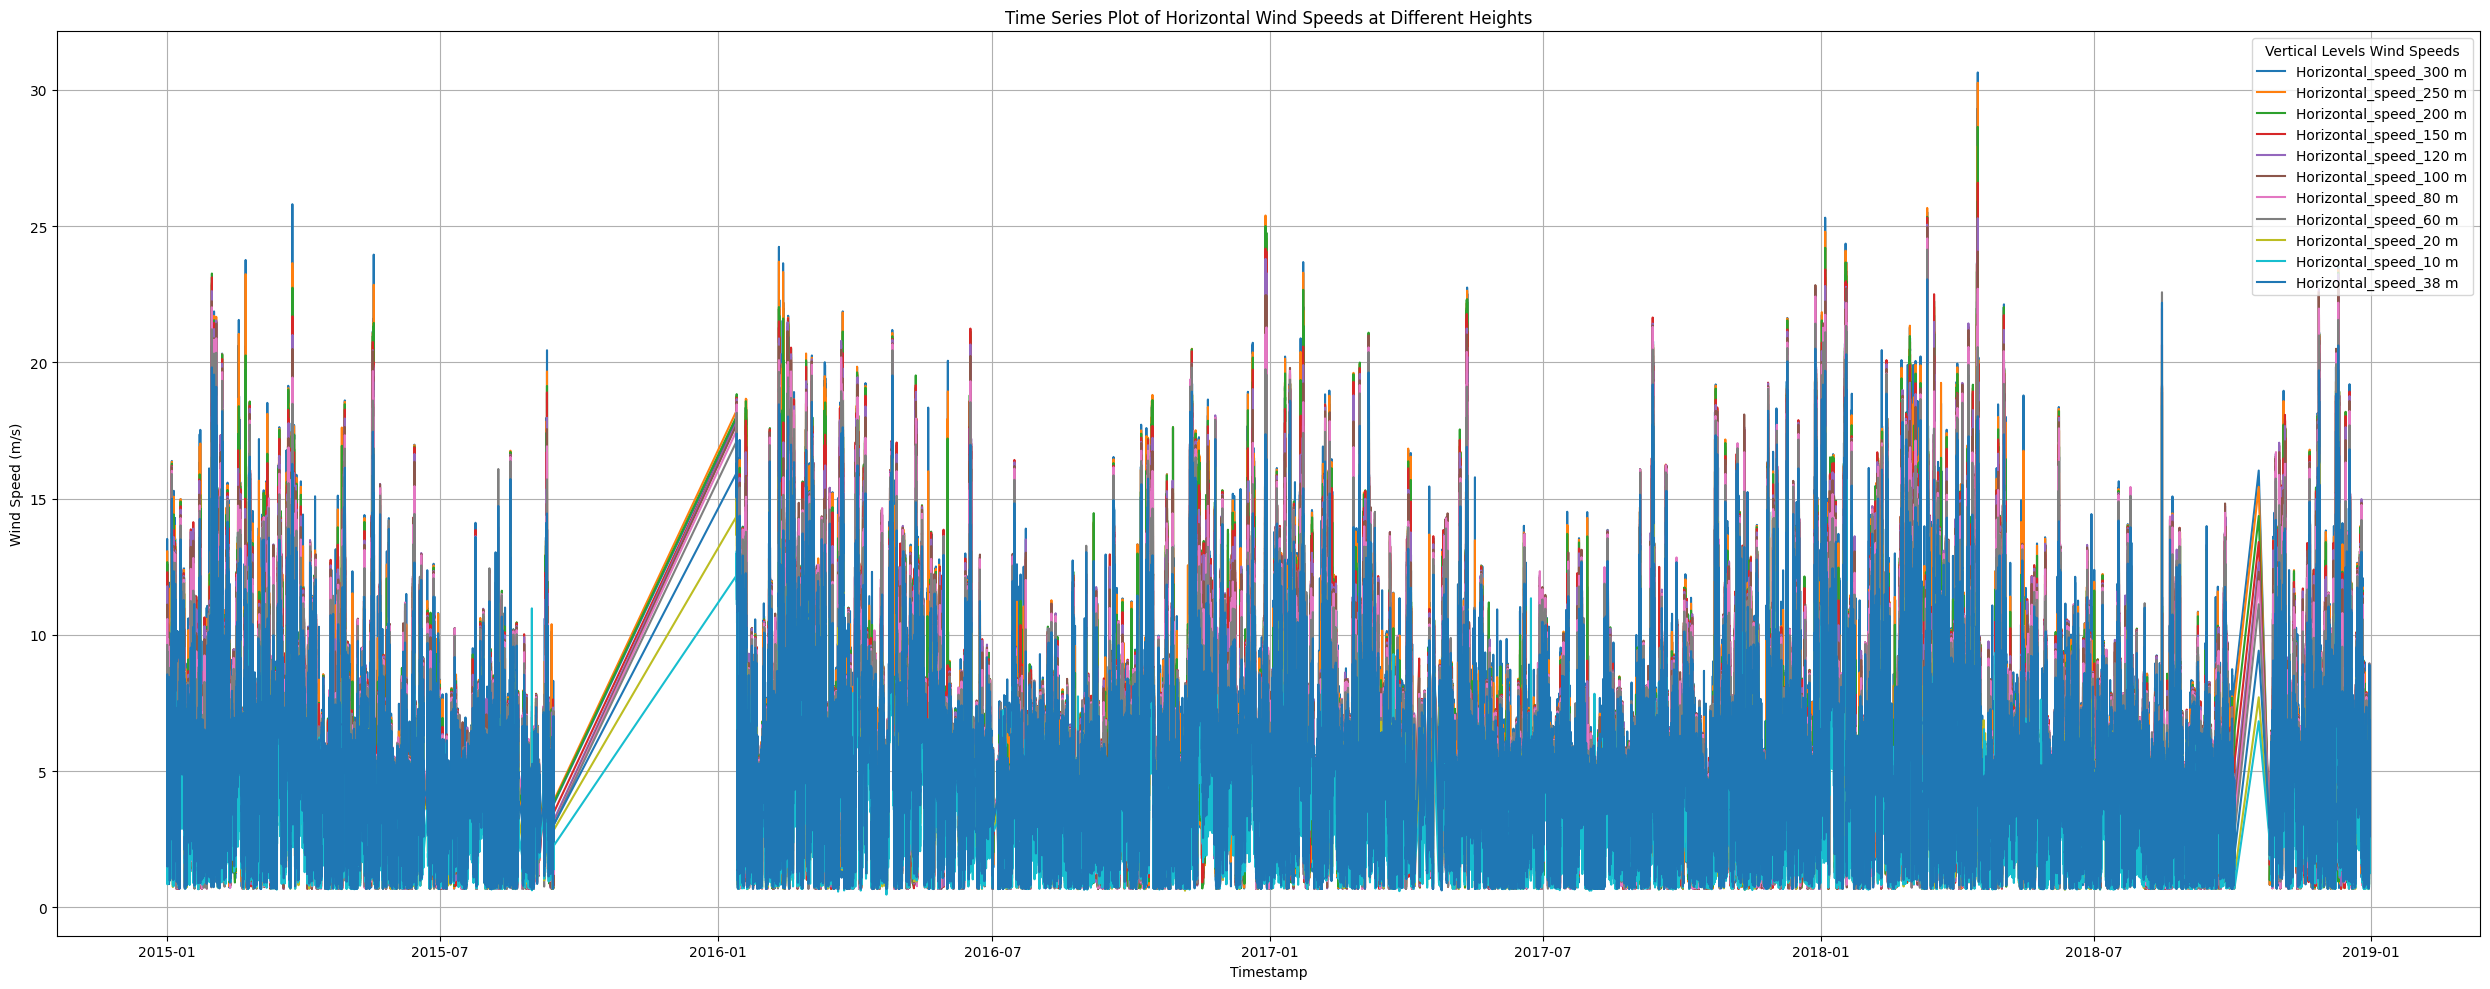

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018.xlsx')

# Identify all columns that contain 'horizontal_speed' in their name
horizontal_speed_cols = [col for col in zephir_df.columns if 'horizontal_speed' in col]

# Drop rows with NaN in any of these columns
zephir_df = zephir_df.dropna(subset=horizontal_speed_cols)

# Define column names
# These are the ORIGINAL names from the Excel file
original_columns = [
    "h_1_horizontal_speed", "h_2_horizontal_speed", "h_3_horizontal_speed",
    "h_4_horizontal_speed", "h_5_horizontal_speed", "h_6_horizontal_speed",
    "h_7_horizontal_speed", "h_8_horizontal_speed", "h_9_horizontal_speed",
    "h_10_horizontal_speed", "h_11_horizontal_speed"
]

# Define the new names after renaming
new_column_names = {
    'h_1_horizontal_speed': 'Horizontal_speed_300 m',
    'h_2_horizontal_speed': 'Horizontal_speed_250 m',
    'h_3_horizontal_speed': 'Horizontal_speed_200 m',
    'h_4_horizontal_speed': 'Horizontal_speed_150 m',
    'h_5_horizontal_speed': 'Horizontal_speed_120 m',
    'h_6_horizontal_speed': 'Horizontal_speed_100 m',
    'h_7_horizontal_speed': 'Horizontal_speed_80 m',
    'h_8_horizontal_speed': 'Horizontal_speed_60 m',
    'h_9_horizontal_speed': 'Horizontal_speed_20 m',
    'h_10_horizontal_speed': 'Horizontal_speed_10 m',
    'h_11_horizontal_speed': 'Horizontal_speed_38 m'
}

# Apply the rename operation
zephir_df.rename(columns=new_column_names, inplace=True)

# Now, create the list of columns to plot using the NEW names
columns_to_plot = list(new_column_names.values())

# Plot
plt.figure(figsize=(25, 10))

# Iterate over the NEW column names for plotting
for col in columns_to_plot:
    # Ensure the column exists in the DataFrame after renaming
    if col in zephir_df.columns:
         plt.plot(zephir_df['Timestamp'], zephir_df[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found after renaming.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Horizontal Wind Speeds at Different Heights')
plt.legend(title="Vertical Levels Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Define the output file path
output_file_path = '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_dropped.xlsx'

# Save the filtered DataFrame to an Excel file
zephir_df.to_excel(output_file_path, index=False)

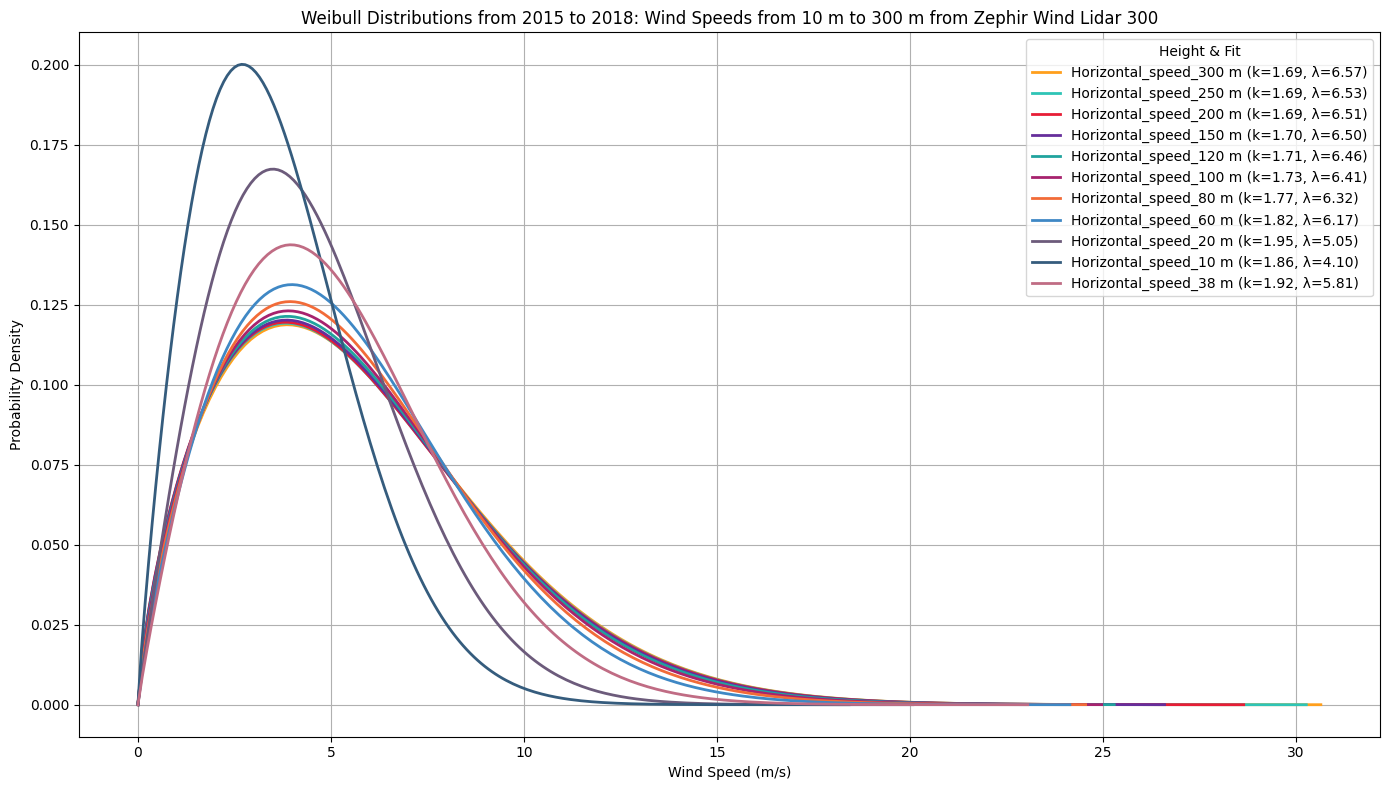

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# === Function to plot Weibull Distributions ===
def plot_weibull_distributions(data, columns, title, colors):
    plt.figure(figsize=(14, 8))

    for idx, col in enumerate(columns):
        if col in data.columns:
            speeds = data[col].dropna()
            speeds = speeds[np.isfinite(speeds.values)].values.flatten()

            if len(speeds) > 1:
                try:
                    shape, loc, scale = weibull_min.fit(speeds, floc=0)
                    x = np.linspace(0, speeds.max(), 200)
                    pdf = weibull_min.pdf(x, shape, loc=0, scale=scale)
                    plt.plot(x, pdf, color=colors[idx % len(colors)], linewidth=2,
                             label=f'{col} (k={shape:.2f}, λ={scale:.2f})')
                except Exception as e:
                    print(f"Error fitting Weibull for {col}: {e}")
            else:
                print(f"Insufficient data to fit Weibull for: {col}")
        else:
            print(f"Column not found: {col}")

    plt.title(title)
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Probability Density')
    plt.legend(title="Height & Fit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Colors for 11 heights ===
colors = [
    '#FF9F1C', '#2EC4B6', '#E71D36', '#662E9B', '#20A39E',
    '#A7226E', '#F26B38', '#3F88C5', '#6C5B7B', '#355C7D', '#C06C84'
]

# === Renamed column list ===
columns = [
    'Horizontal_speed_300 m',
    'Horizontal_speed_250 m',
    'Horizontal_speed_200 m',
    'Horizontal_speed_150 m',
    'Horizontal_speed_120 m',
    'Horizontal_speed_100 m',
    'Horizontal_speed_80 m',
    'Horizontal_speed_60 m',
    'Horizontal_speed_20 m',
    'Horizontal_speed_10 m',
    'Horizontal_speed_38 m'
]

# === Plot the Weibull fits ===
plot_weibull_distributions(
    data=zephir_df,
    columns=columns,
    title='Weibull Distributions from 2015 to 2018: Wind Speeds from 10 m to 300 m from Zephir Wind Lidar 300',
    colors=colors
)

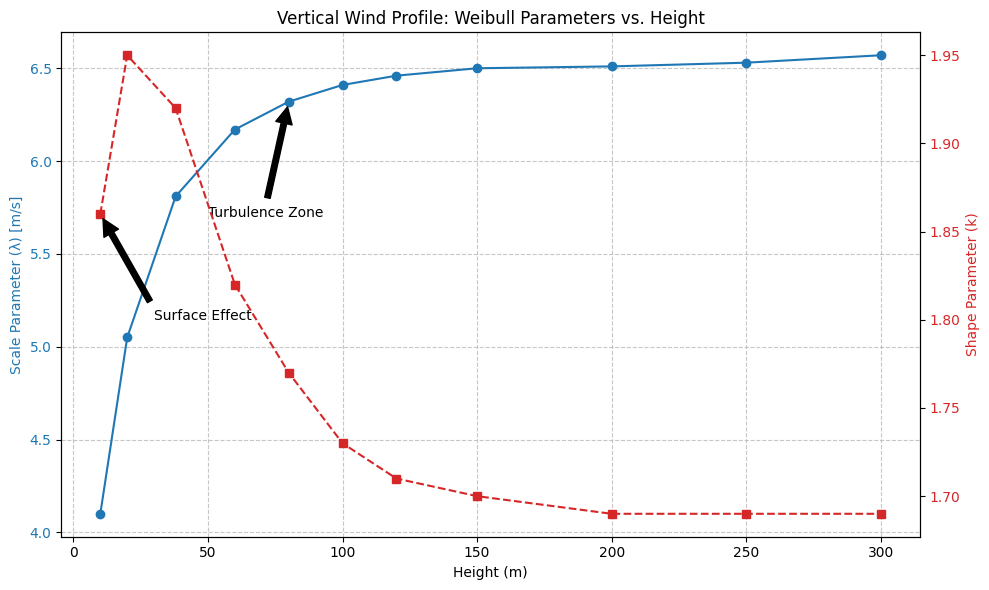

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data from image
heights = [300, 250, 200, 150, 120, 100, 80, 60, 20, 10, 38]
lambda_vals = [6.57, 6.53, 6.51, 6.50, 6.46, 6.41, 6.32, 6.17, 5.05, 4.10, 5.81]
k_vals = [1.69, 1.69, 1.69, 1.70, 1.71, 1.73, 1.77, 1.82, 1.95, 1.86, 1.92]

# Sort by height
sorted_idx = np.argsort(heights)
heights = np.array(heights)[sorted_idx]
lambda_vals = np.array(lambda_vals)[sorted_idx]
k_vals = np.array(k_vals)[sorted_idx]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Lambda (wind speed) axis
ax1.set_xlabel('Height (m)')
ax1.set_ylabel('Scale Parameter (λ) [m/s]', color='tab:blue')
ax1.plot(heights, lambda_vals, 'o-', color='tab:blue', label='Wind Speed (λ)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(linestyle='--', alpha=0.7)

# K (turbulence) axis
ax2 = ax1.twinx()
ax2.set_ylabel('Shape Parameter (k)', color='tab:red')
ax2.plot(heights, k_vals, 's--', color='tab:red', label='Turbulence (k)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Annotations
ax1.annotate('Turbulence Zone', xy=(80, 6.32), xytext=(50, 5.7),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('Surface Effect', xy=(10, 1.86), xytext=(30, 1.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Vertical Wind Profile: Weibull Parameters vs. Height')
fig.tight_layout()
plt.show()

# **Cleaning, Normalization, Feature Engineering (Lag Features, ETS Decomposition)**

Processing feature: Horizontal_speed_300 m
ADF Statistic for Horizontal_speed_300 m: -29.904087759700708
p-value: 0.0
Critical Value (1%): -3.430386285814174
Critical Value (5%): -2.861556037840044
Critical Value (10%): -2.5667785363673454


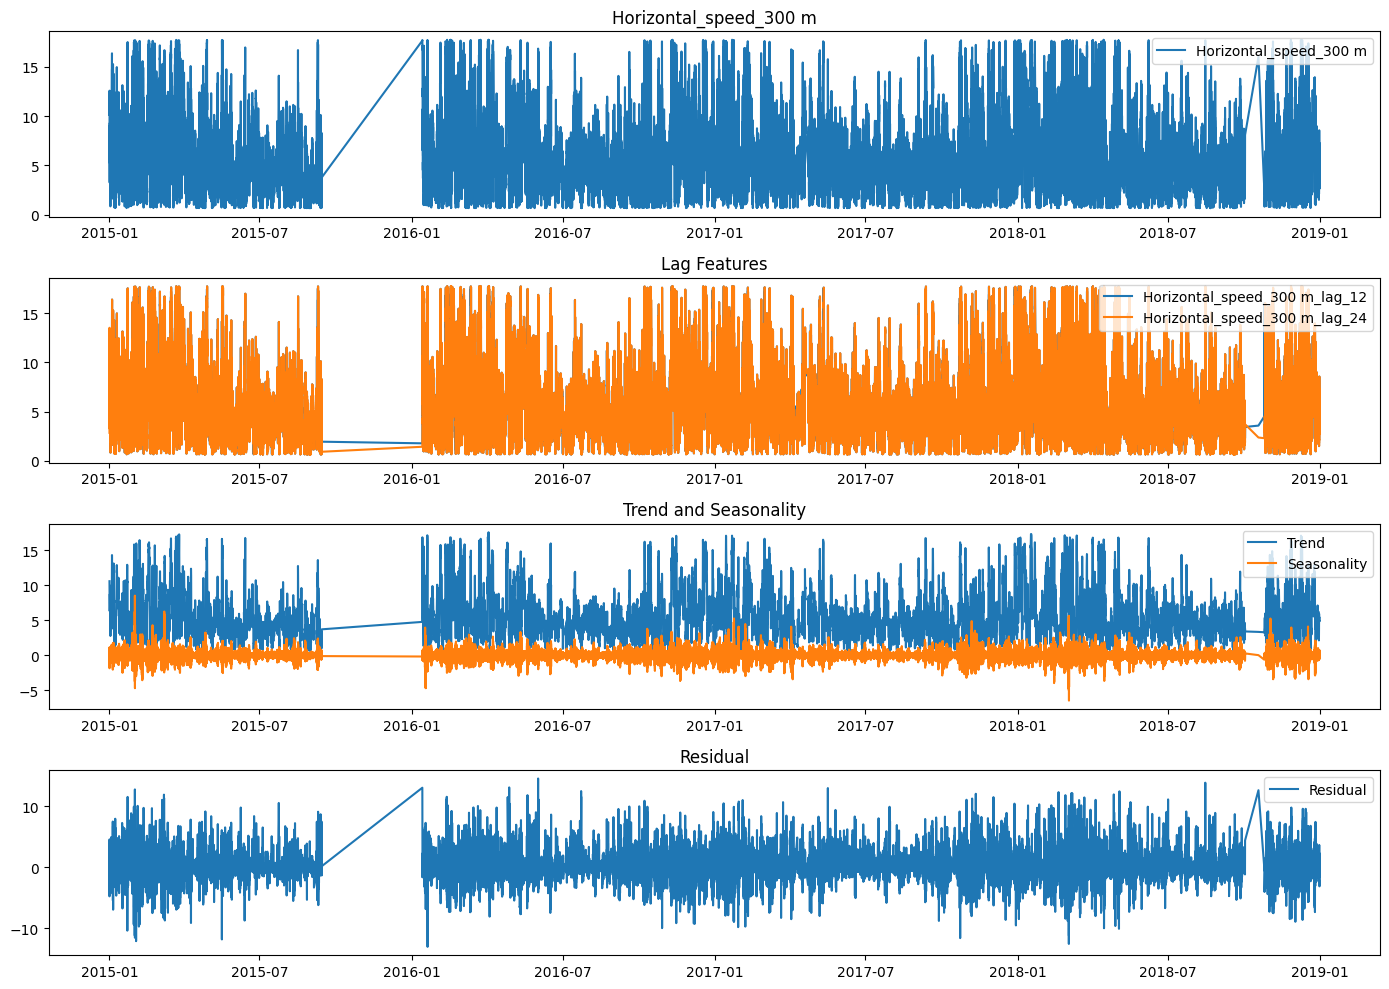

Processing feature: Horizontal_speed_250 m
ADF Statistic for Horizontal_speed_250 m: -30.115397889964353
p-value: 0.0
Critical Value (1%): -3.430386278164648
Critical Value (5%): -2.8615560344590776
Critical Value (10%): -2.5667785345677743


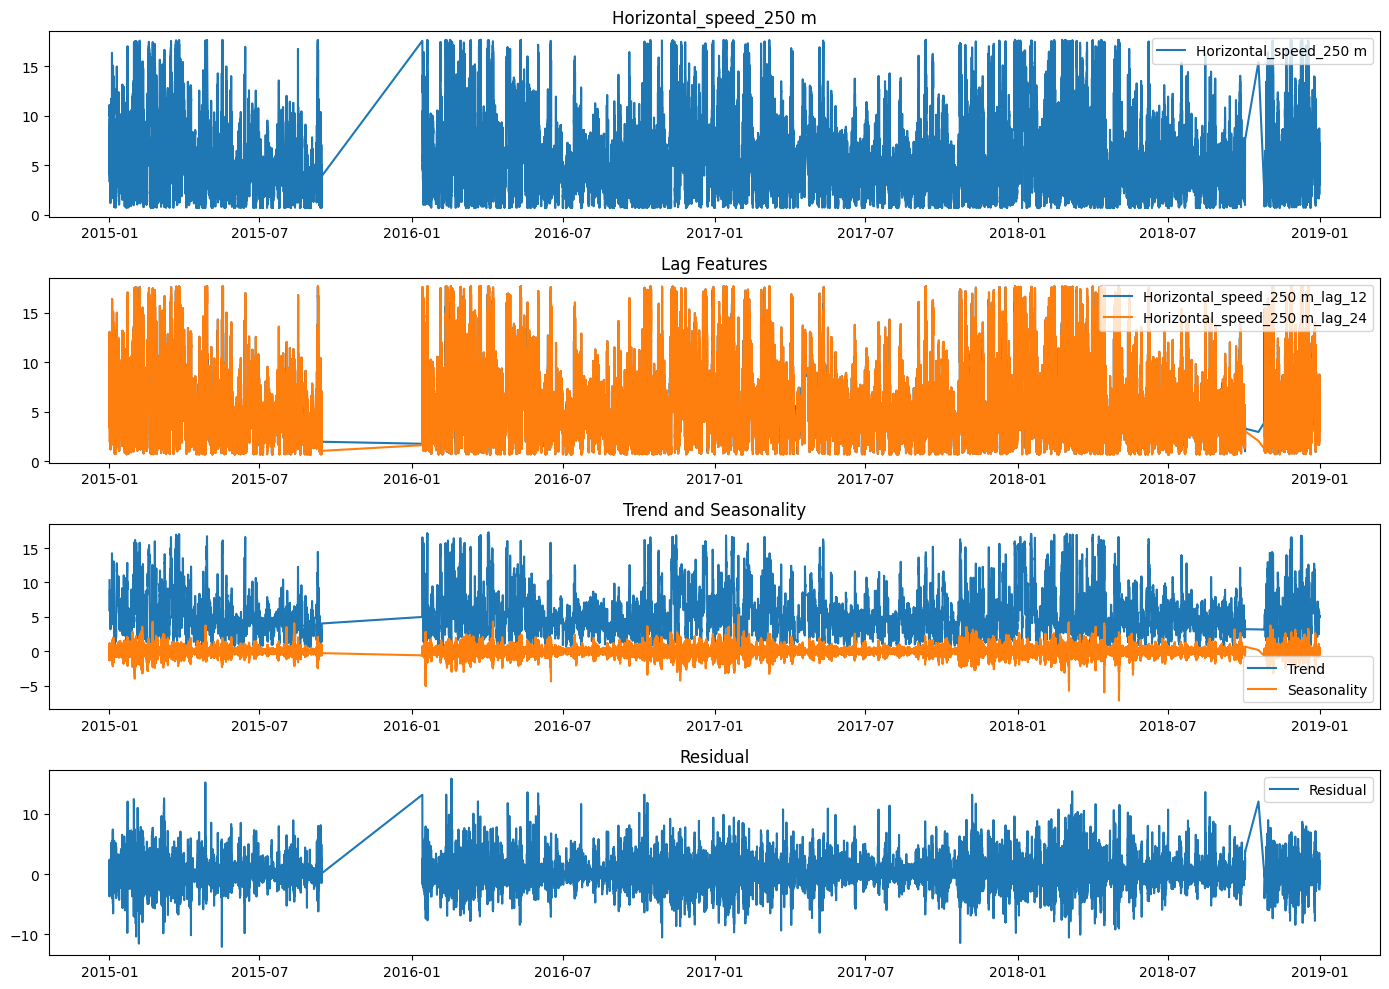

Processing feature: Horizontal_speed_200 m
ADF Statistic for Horizontal_speed_200 m: -28.934341877310224
p-value: 0.0
Critical Value (1%): -3.430386285814174
Critical Value (5%): -2.861556037840044
Critical Value (10%): -2.5667785363673454


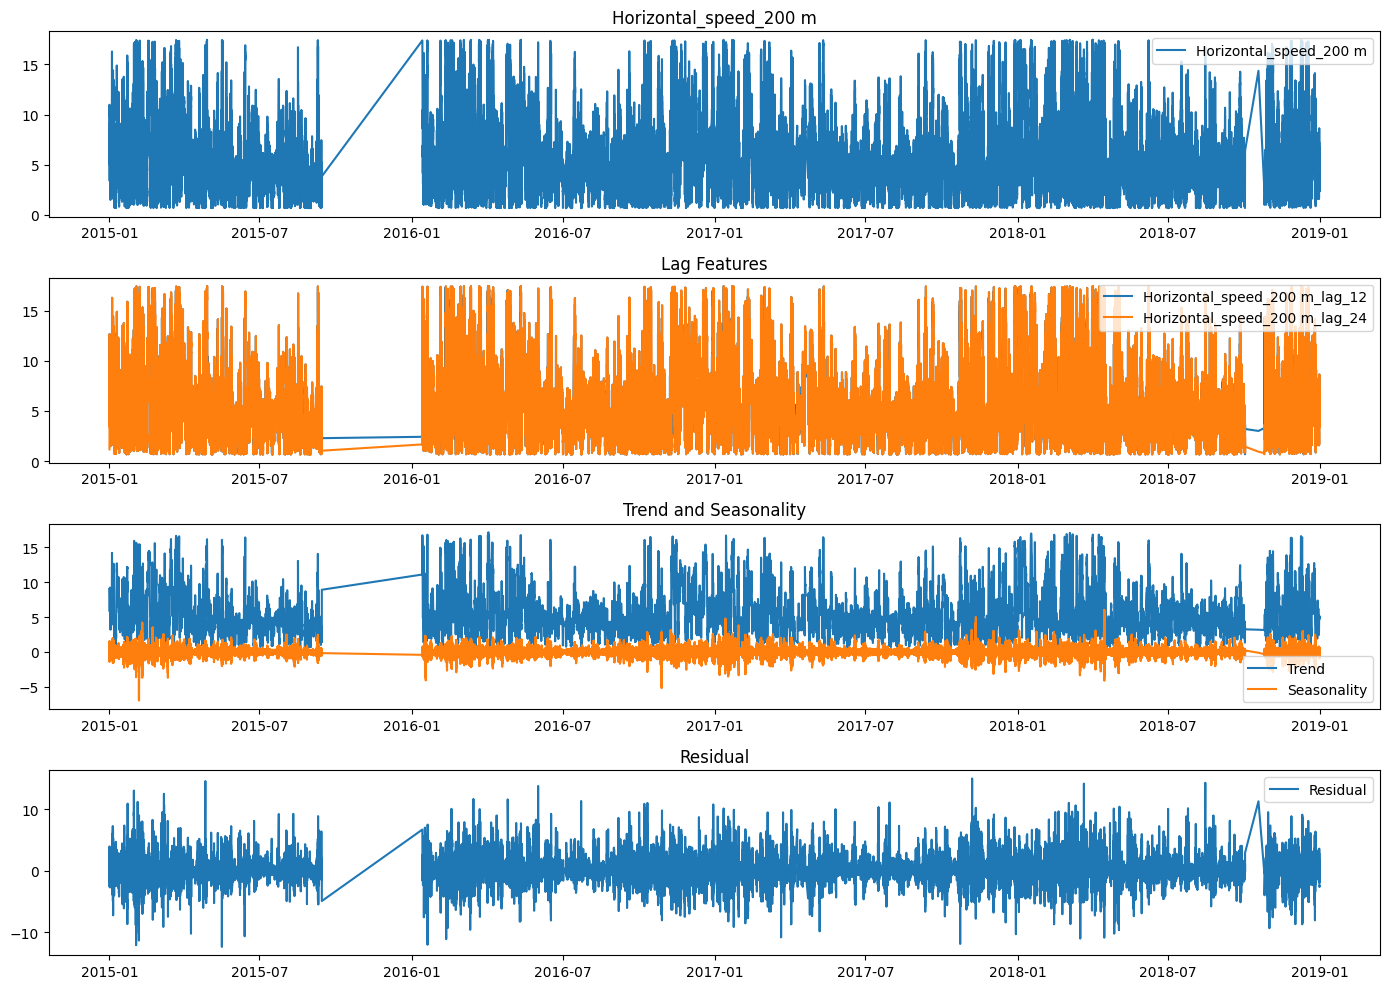

Processing feature: Horizontal_speed_150 m
ADF Statistic for Horizontal_speed_150 m: -29.308016602835668
p-value: 0.0
Critical Value (1%): -3.430386286820931
Critical Value (5%): -2.861556038285014
Critical Value (10%): -2.5667785366041875


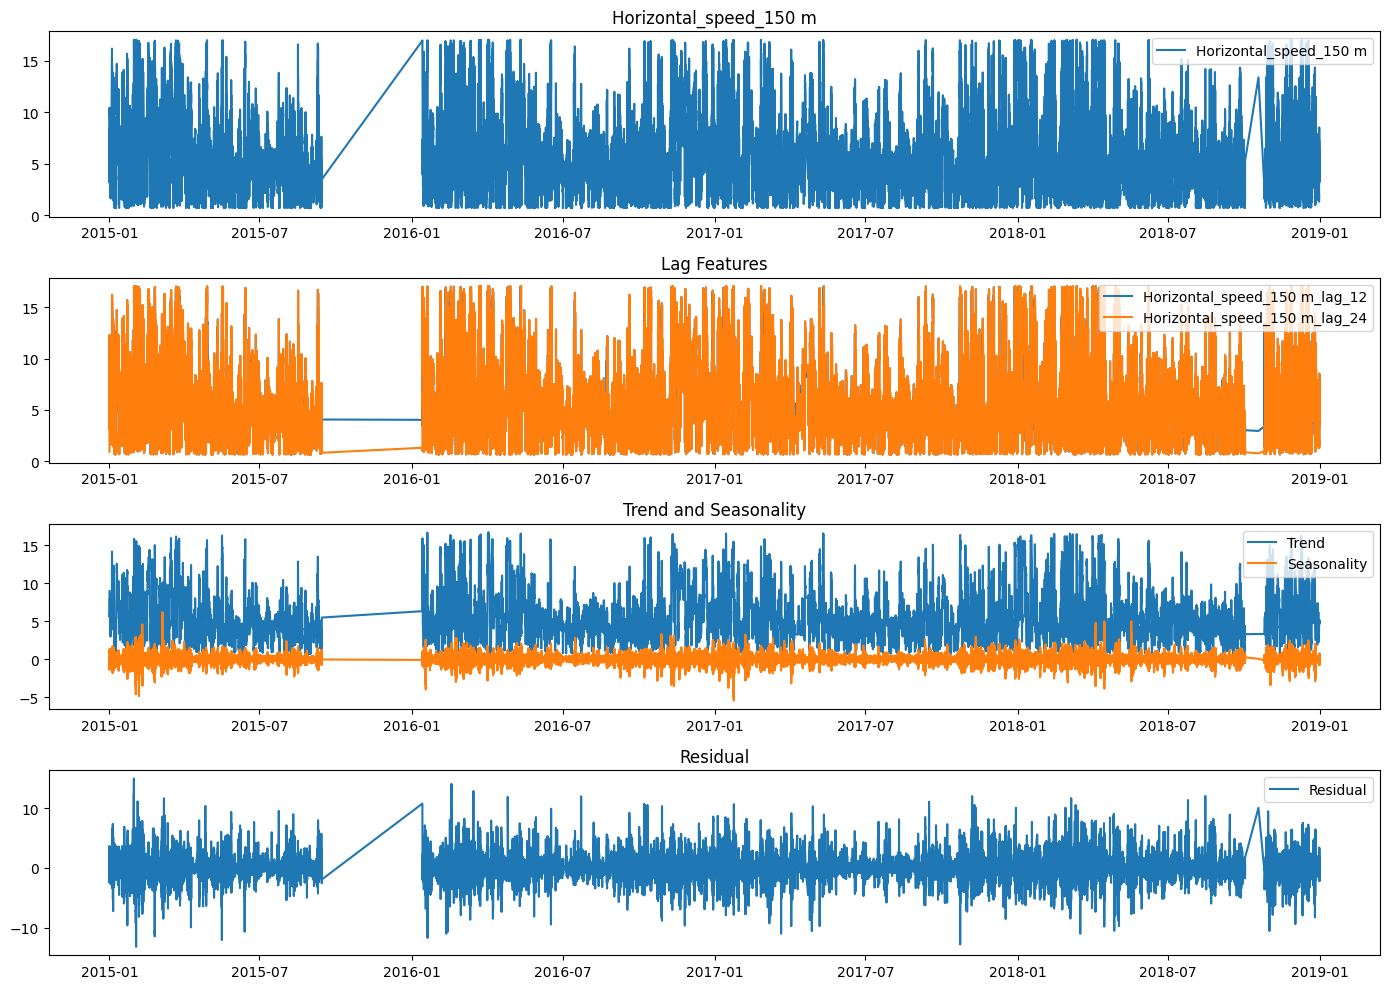

Processing feature: Horizontal_speed_120 m
ADF Statistic for Horizontal_speed_120 m: -28.47749736652993
p-value: 0.0
Critical Value (1%): -3.430386289640147
Critical Value (5%): -2.861556039531062
Critical Value (10%): -2.5667785372674152


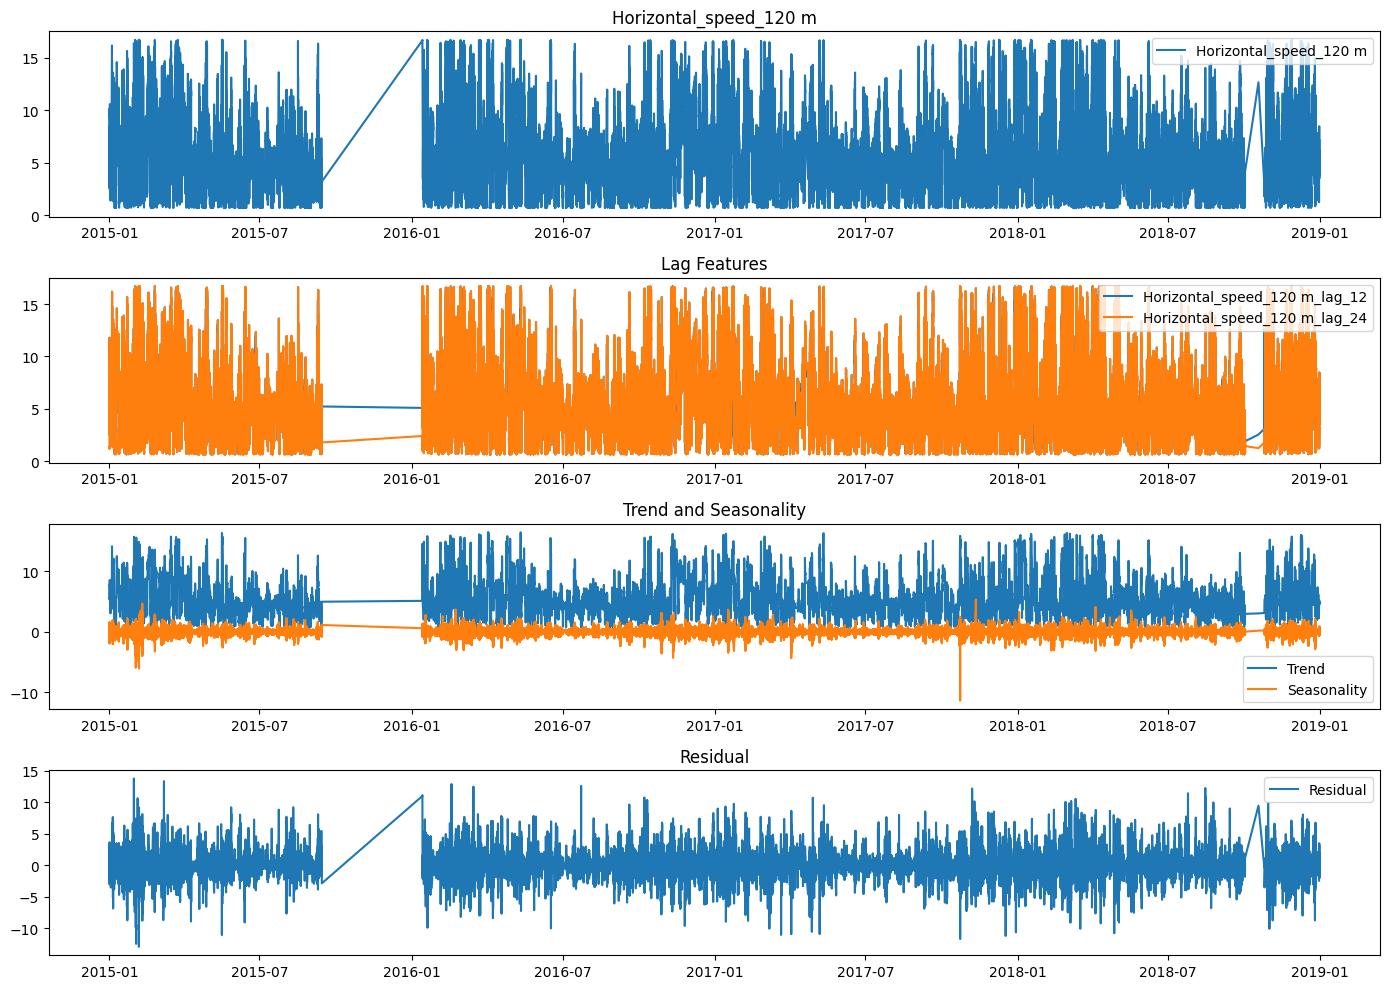

Processing feature: Horizontal_speed_100 m
ADF Statistic for Horizontal_speed_100 m: -28.814927689149744
p-value: 0.0
Critical Value (1%): -3.4303862890359924
Critical Value (5%): -2.8615560392640353
Critical Value (10%): -2.5667785371252863


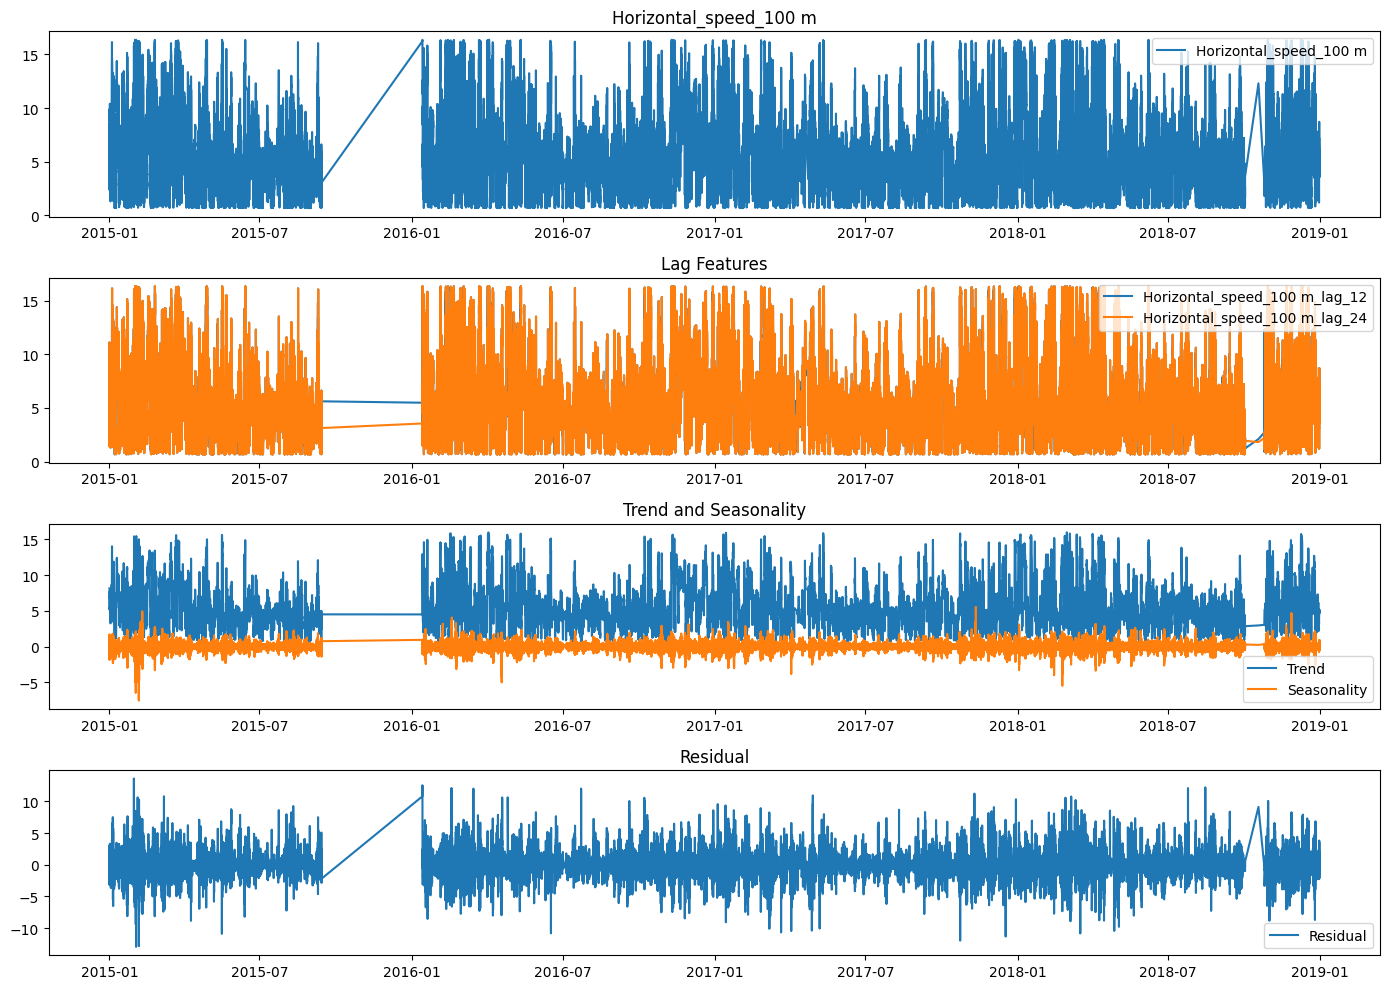

Processing feature: Horizontal_speed_80 m
ADF Statistic for Horizontal_speed_80 m: -27.974491861719724
p-value: 0.0
Critical Value (1%): -3.4303862769571234
Critical Value (5%): -2.861556033925371
Critical Value (10%): -2.566778534283701


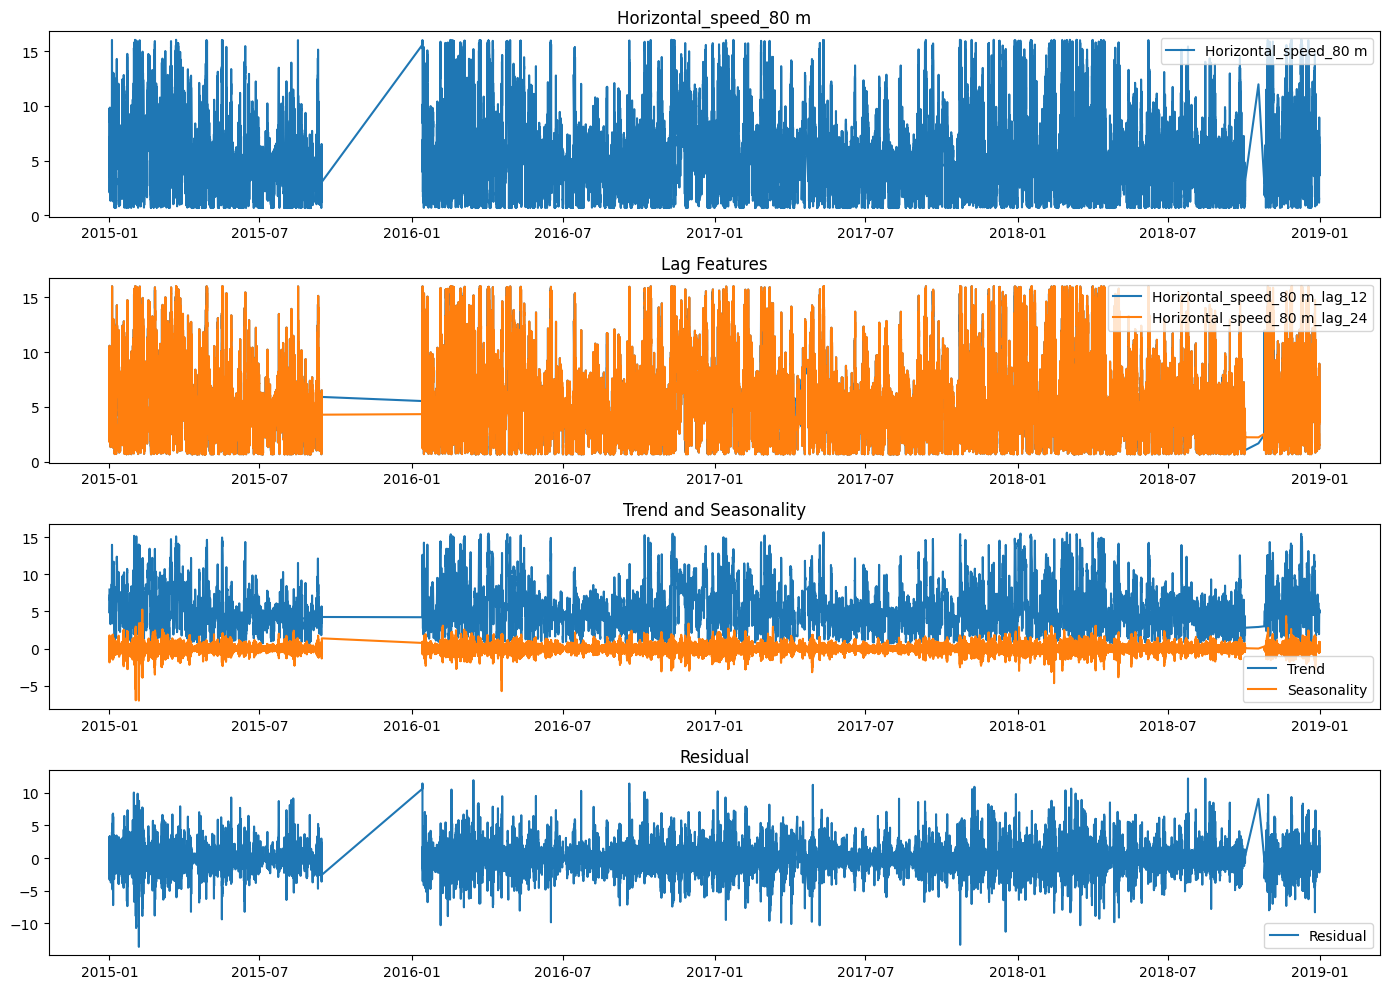

Processing feature: Horizontal_speed_60 m
ADF Statistic for Horizontal_speed_60 m: -28.328755123907506
p-value: 0.0
Critical Value (1%): -3.4303862833981857
Critical Value (5%): -2.8615560367722166
Critical Value (10%): -2.566778535798978


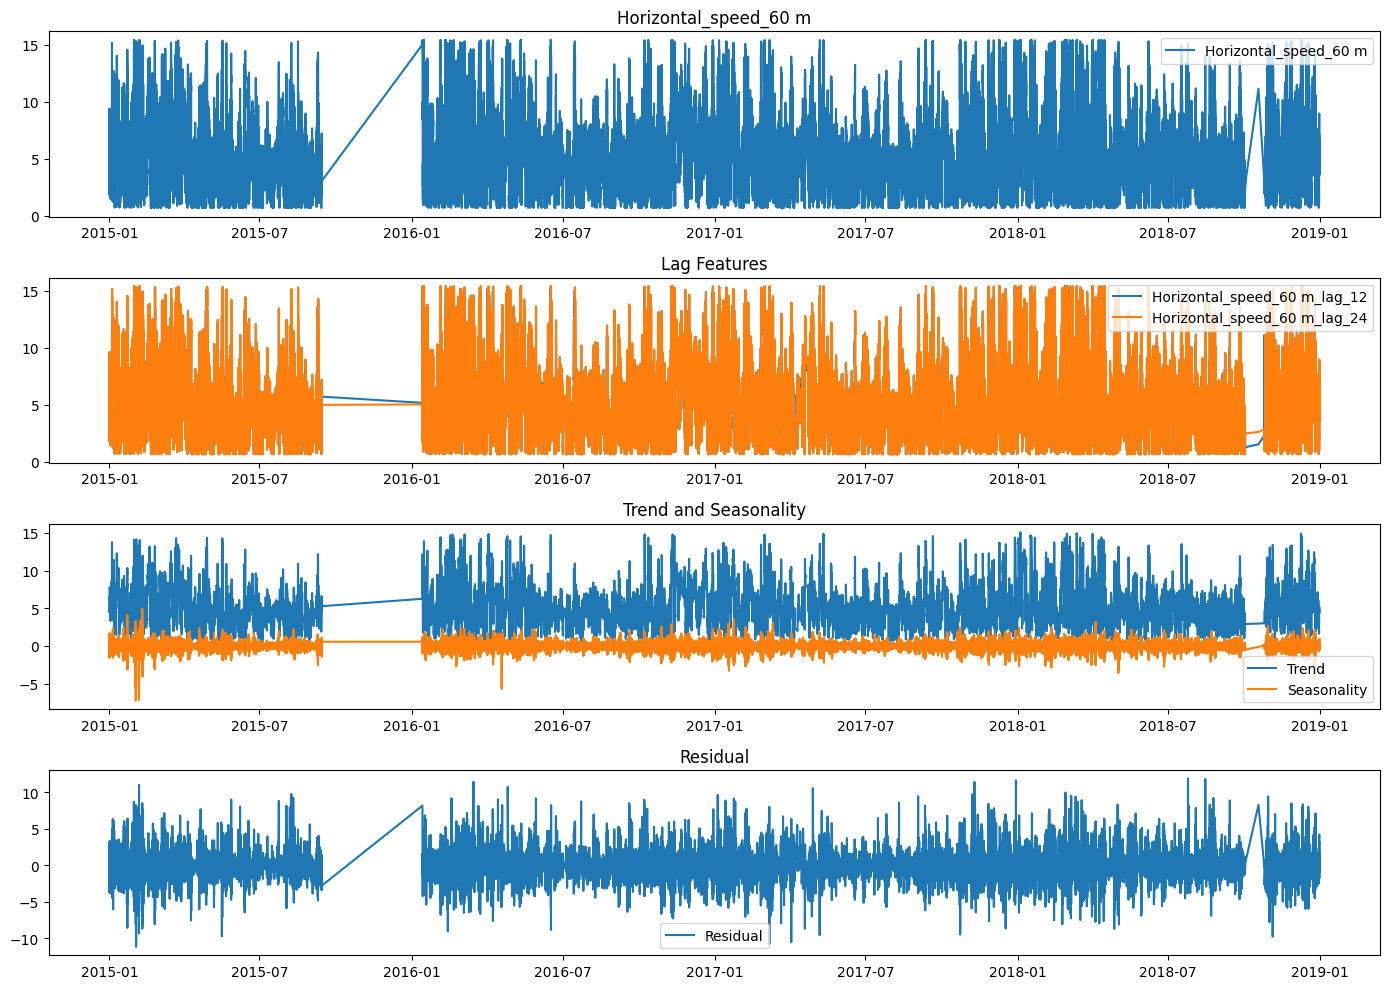

Processing feature: Horizontal_speed_20 m
ADF Statistic for Horizontal_speed_20 m: -42.41946348816034
p-value: 0.0
Critical Value (1%): -3.4303862753472147
Critical Value (5%): -2.8615560332138177
Critical Value (10%): -2.566778533904966


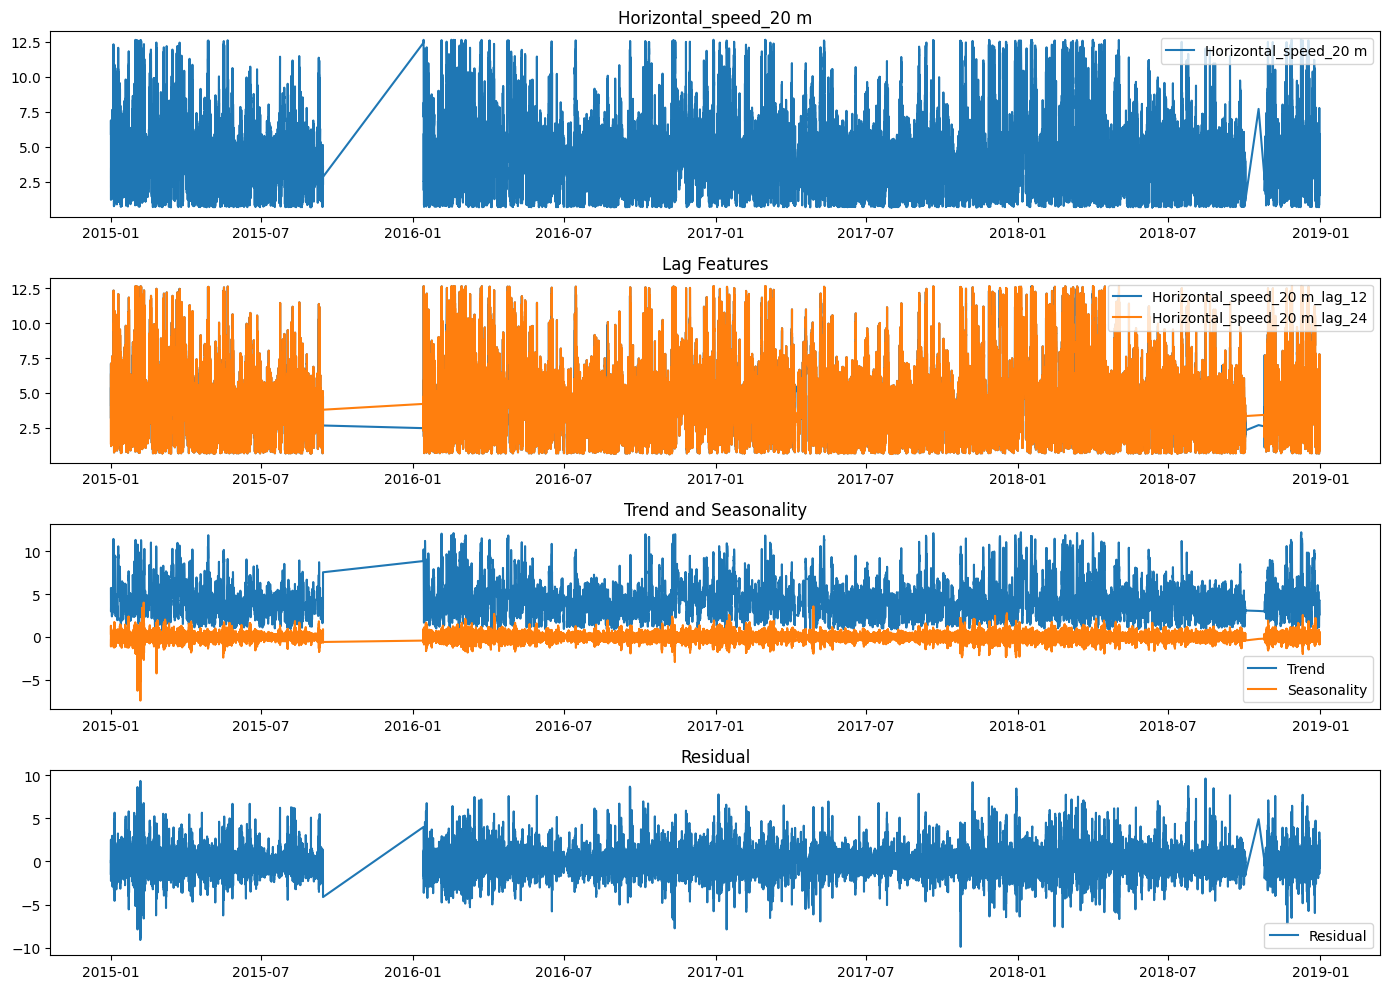

Processing feature: Horizontal_speed_10 m
ADF Statistic for Horizontal_speed_10 m: -42.810732775259005
p-value: 0.0
Critical Value (1%): -3.430386278768441
Critical Value (5%): -2.861556034725944
Critical Value (10%): -2.566778534709818


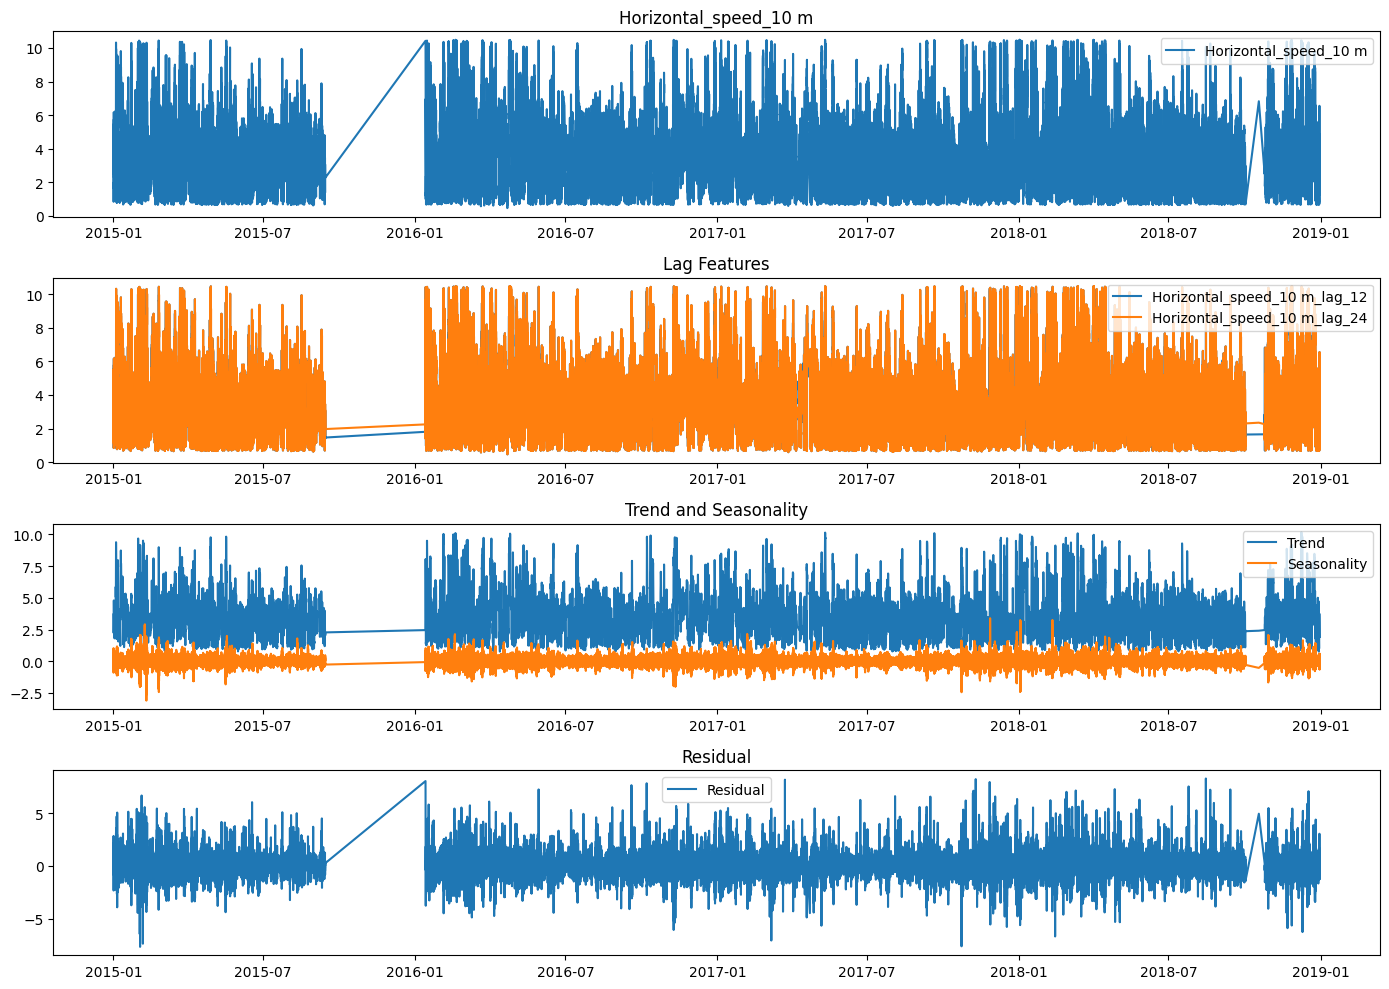

Processing feature: Horizontal_speed_38 m
ADF Statistic for Horizontal_speed_38 m: -29.4252313628538
p-value: 0.0
Critical Value (1%): -3.4303862918555525
Critical Value (5%): -2.8615560405102354
Critical Value (10%): -2.566778537788595


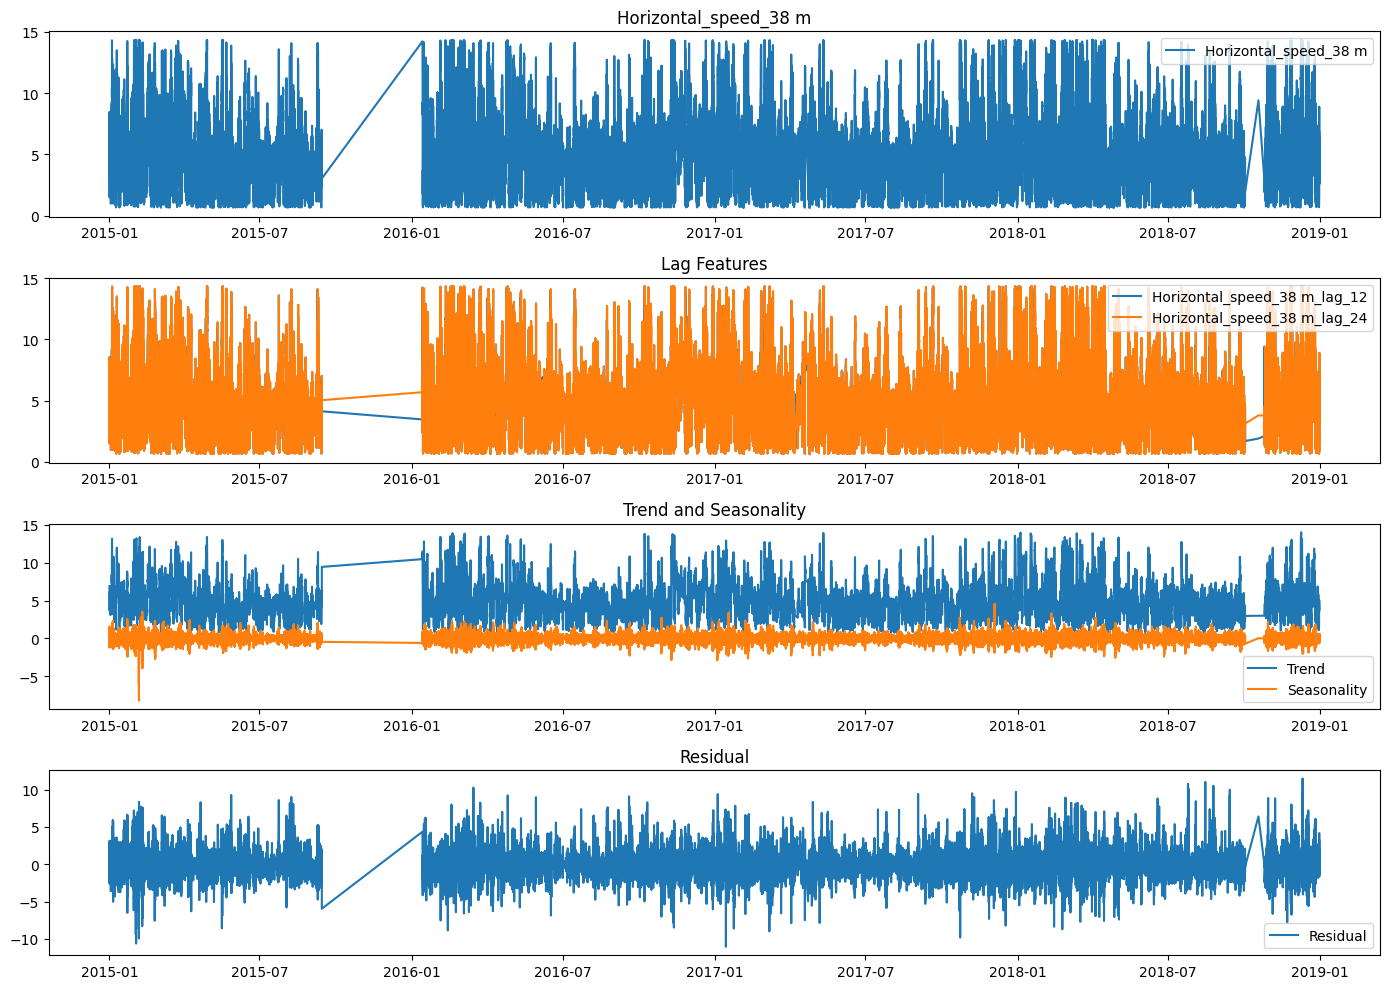

NameError: name 'columns' is not defined

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import STL
from verstack import NaNImputer  # Import NaNImputer as it was used previously
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Load Data ---
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_dropped.xlsx', parse_dates=['Timestamp'], index_col='Timestamp')

# --- Step 1: Sensor Fault Removal using Isolation Forest ---
def remove_outliers(df, feature_col):
    if df.empty:
        return df
    iso = IsolationForest(contamination=0.01, random_state=42)
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for outlier removal.")
        return df
    mask = iso.fit_predict(df[[feature_col]])
    return df[mask == 1]

# --- Step 2: Lag Features ---
def add_lag_features(df, feature_col, lags=[12]):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for adding lag features.")
        return df
    for lag in lags:
        df[f'{feature_col}_lag_{lag}'] = df[feature_col].shift(lag)
    return df

# --- Step 3: STL Decomposition ---
def apply_stl(df, feature_col, period=12):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for STL decomposition.")
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    if df[feature_col].isna().all():
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    stl = STL(df[feature_col], period=period, robust=True)
    result = stl.fit()
    df[f'{feature_col}_trend'] = result.trend
    df[f'{feature_col}_seasonal'] = result.seasonal
    df[f'{feature_col}_resid'] = result.resid
    return df

# --- Stationarity Test ---
def test_stationarity(df, feature_col):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for stationarity test.")
        return
    result = adfuller(df[feature_col].dropna())
    print(f"ADF Statistic for {feature_col}: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")

# --- Plotting Function ---
def plot_feature_components(df, feature_col, lags=[12]):
    plt.figure(figsize=(14, 10))

    plt.subplot(4, 1, 1)
    plt.plot(df[feature_col], label=feature_col)
    plt.title(f'{feature_col}')
    plt.legend()

    for i, lag in enumerate(lags):
        plt.subplot(4, 1, 2)
        lag_col = f'{feature_col}_lag_{lag}'
        if lag_col in df.columns:
            plt.plot(df[lag_col], label=lag_col)
    plt.title('Lag Features')
    plt.legend()

    plt.subplot(4, 1, 3)
    if f'{feature_col}_trend' in df.columns:
        plt.plot(df[f'{feature_col}_trend'], label='Trend')
    if f'{feature_col}_seasonal' in df.columns:
        plt.plot(df[f'{feature_col}_seasonal'], label='Seasonality')
    plt.title('Trend and Seasonality')
    plt.legend()

    plt.subplot(4, 1, 4)
    if f'{feature_col}_resid' in df.columns:
        plt.plot(df[f'{feature_col}_resid'], label='Residual')
    plt.title('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Master Pipeline ---
def preprocess_zephir(zephir_df, feature_cols=['wind_speed'], lags=[12], stl_period=12):
    if zephir_df.empty:
        raise ValueError("Input DataFrame is empty.")

    processed_dfs = {}

    for feature_col in feature_cols:
        print(f"Processing feature: {feature_col}")
        current_df = zephir_df.copy()

        clean_df = remove_outliers(current_df, feature_col)
        if clean_df.empty:
            print(f"Warning: All data removed as outliers for feature: {feature_col}. Skipping.")
            continue

        fe_df = add_lag_features(clean_df, feature_col, lags)
        fe_df = apply_stl(fe_df, feature_col, period=stl_period)

        subset_cols = [feature_col] + [f'{feature_col}_lag_{lag}' for lag in lags] + [f'{feature_col}_trend', f'{feature_col}_seasonal', f'{feature_col}_resid']
        subset_cols = [col for col in subset_cols if col in fe_df.columns]

        fe_df.dropna(subset=subset_cols, inplace=True)
        if fe_df.empty:
            print(f"Warning: No data left after dropping NaNs for feature: {feature_col}. Skipping.")
            continue

        processed_dfs[feature_col] = fe_df

        test_stationarity(fe_df, feature_col)
        plot_feature_components(fe_df, feature_col, lags)

    return processed_dfs

# Example usage:
wind_speed_columns = [
    'Horizontal_speed_300 m',
    'Horizontal_speed_250 m',
    'Horizontal_speed_200 m',
    'Horizontal_speed_150 m',
    'Horizontal_speed_120 m',
    'Horizontal_speed_100 m',
    'Horizontal_speed_80 m',
    'Horizontal_speed_60 m',
    'Horizontal_speed_20 m',
    'Horizontal_speed_10 m',
    'Horizontal_speed_38 m'
]

processed_data = preprocess_zephir(zephir_df, feature_cols=wind_speed_columns, lags=[12, 24], stl_period=12)

# Dictionary to store successfully processed DataFrames
processed_dfs = {}

# Check each column
for col in columns:
    if col in processed_data:
        processed_df = processed_data[col]
        print(f"\nFirst 5 rows of '{col}':")
        print(processed_df.head())
        processed_dfs[col] = processed_df
    else:
        print(f"Processing failed for '{col}'.")

# Convert dictionary to a DataFrame for saving (align on index)
final_df = pd.concat(processed_dfs, axis=1)

# Save to Excel
output_path = '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_preprocessed.xlsx'
final_df.to_excel(output_path)

print(f"\nSaved processed data to: {output_path}")

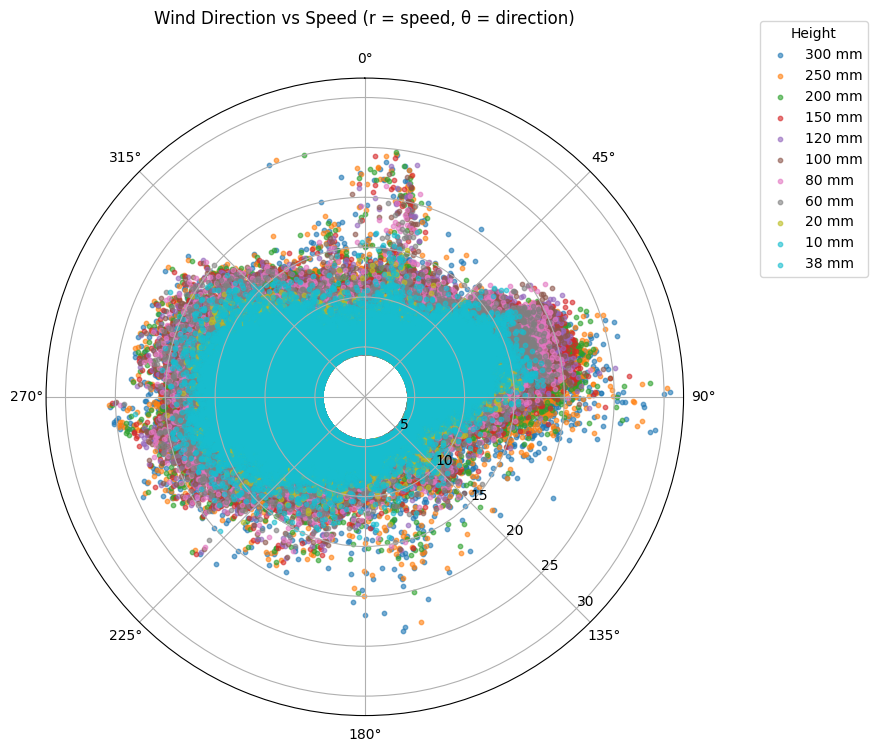

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the horizontal speed columns
columns = [
    'Horizontal_speed_300 m',
    'Horizontal_speed_250 m',
    'Horizontal_speed_200 m',
    'Horizontal_speed_150 m',
    'Horizontal_speed_120 m',
    'Horizontal_speed_100 m',
    'Horizontal_speed_80 m',
    'Horizontal_speed_60 m',
    'Horizontal_speed_20 m',
    'Horizontal_speed_10 m',
    'Horizontal_speed_38 m'
]

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, polar=True)

colors = plt.cm.tab10(np.linspace(0, 1, len(columns)))

for i, speed_col in enumerate(columns):
    try:
        idx = zephir_df.columns.get_loc(speed_col)
        direction_col = zephir_df.columns[idx + 2]  # Direction is 2 columns right

        # Filter rows with speed > 4.5
        mask = zephir_df[speed_col] > 4.5
        filtered = zephir_df.loc[mask, [speed_col, direction_col]].dropna()

        # Extract values
        speeds = filtered[speed_col]
        directions = filtered[direction_col]
        angles_rad = np.deg2rad(directions)

        # Plot each point with r = speed, θ = direction
        ax.scatter(angles_rad, speeds, s=10, alpha=0.6,
                   color=colors[i % len(colors)],
                   label=speed_col.replace('Horizontal_speed_', '') + 'm')

    except Exception as e:
        print(f"Error with {speed_col}: {e}")

# Format plot
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlabel_position(135)
ax.legend(title="Height", bbox_to_anchor=(1.3, 1.1))

plt.title('Wind Direction vs Speed (r = speed, θ = direction)', pad=20)
plt.tight_layout()
plt.show()


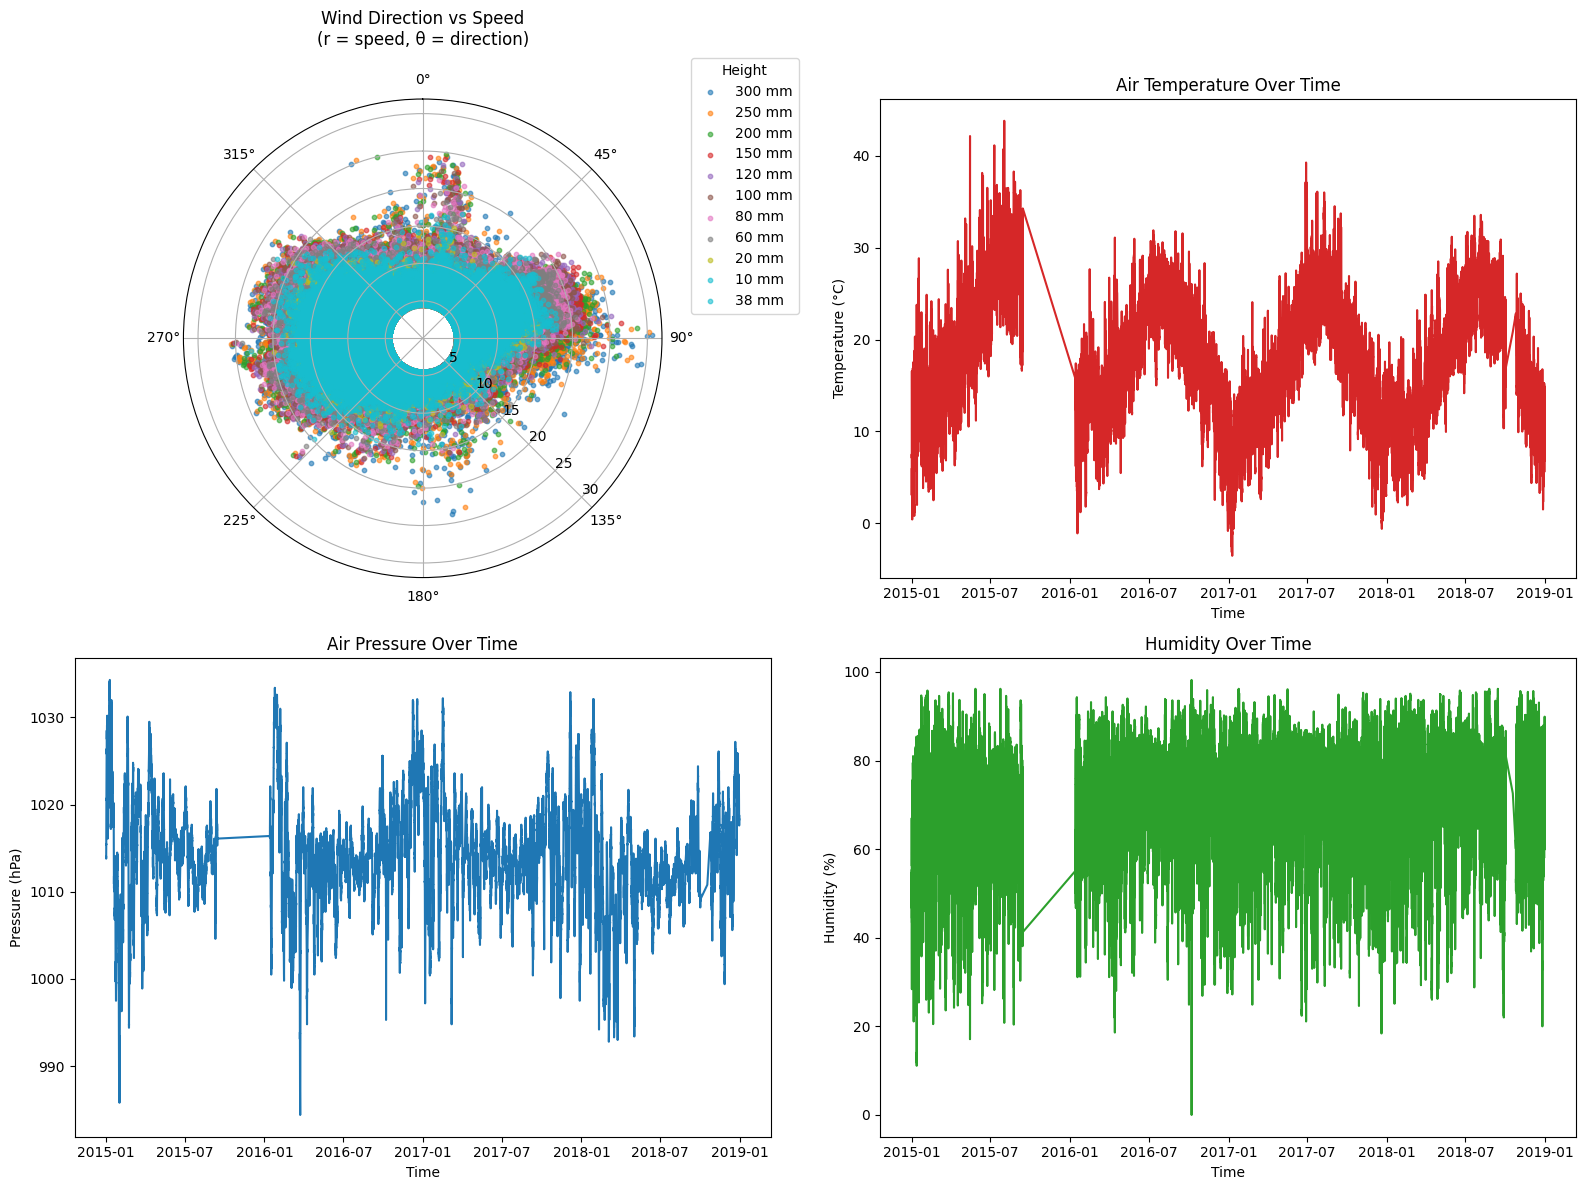

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define speed columns
columns = [
    'Horizontal_speed_300 m',
    'Horizontal_speed_250 m',
    'Horizontal_speed_200 m',
    'Horizontal_speed_150 m',
    'Horizontal_speed_120 m',
    'Horizontal_speed_100 m',
    'Horizontal_speed_80 m',
    'Horizontal_speed_60 m',
    'Horizontal_speed_20 m',
    'Horizontal_speed_10 m',
    'Horizontal_speed_38 m'
]

# Create figure with 4 subplots (1 polar + 3 time series)
fig = plt.figure(figsize=(16, 12))

# === Subplot 1: Polar Wind Scatter ===
ax1 = plt.subplot(2, 2, 1, polar=True)
colors = plt.cm.tab10(np.linspace(0, 1, len(columns)))

for i, speed_col in enumerate(columns):
    try:
        idx = zephir_df.columns.get_loc(speed_col)
        direction_col = zephir_df.columns[idx + 2]

        mask = zephir_df[speed_col] > 4.5
        filtered = zephir_df.loc[mask, [speed_col, direction_col]].dropna()

        speeds = filtered[speed_col]
        directions = filtered[direction_col]
        angles_rad = np.deg2rad(directions)

        ax1.scatter(angles_rad, speeds, s=10, alpha=0.6,
                    color=colors[i % len(colors)],
                    label=speed_col.replace('Horizontal_speed_', '') + 'm')
    except Exception as e:
        print(f"Error with {speed_col}: {e}")

ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_rlabel_position(135)
ax1.legend(title="Height", bbox_to_anchor=(1.3, 1.1))
ax1.set_title('Wind Direction vs Speed\n(r = speed, θ = direction)', pad=20)

# Ensure data sorted by time
zephir_df = zephir_df.sort_index()

# === Subplot 2: Air Temperature ===
ax2 = plt.subplot(2, 2, 2)
ax2.plot(zephir_df.index, zephir_df['air_temperature'], color='tab:red')
ax2.set_title('Air Temperature Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature (°C)')

# === Subplot 3: Air Pressure ===
ax3 = plt.subplot(2, 2, 3)
ax3.plot(zephir_df.index, zephir_df['air_pressure'], color='tab:blue')
ax3.set_title('Air Pressure Over Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Pressure (hPa)')

# === Subplot 4: Humidity ===
ax4 = plt.subplot(2, 2, 4)
ax4.plot(zephir_df.index, zephir_df['humidity'], color='tab:green')
ax4.set_title('Humidity Over Time')
ax4.set_xlabel('Time')
ax4.set_ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

# **Vaisala Meteo Mast Data Preprocessing**

In [1]:
# prompt: From zephir_df extract the tuples from Timestamp: 2016-01-13 to 2018-12-31 and create an excel file in '/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/'

import pandas as pd
# Filter the DataFrame for the specific time period
Test_df= pd.read_excel('/content/drive/MyDrive/Wind Data/LMT_Meteo20152024_with_Timestamp.xlsx')
start_datetime_filter = pd.to_datetime('2015-01-01')
end_datetime_filter = pd.to_datetime('2018-12-31')
zephir_df_filtered = Test_df[(Test_df['date'] >= start_datetime_filter) & (Test_df['date'] <= end_datetime_filter)].copy()

# Define the output file path
output_file_path = '/content/drive/MyDrive/Wind Data/LMT_Meteo20152024_2015-2018.xlsx'

# Save the filtered DataFrame to an Excel file
zephir_df_filtered.to_excel(output_file_path, index=False)

print(f"Filtered data saved to: {output_file_path}")

Filtered data saved to: /content/drive/MyDrive/Wind Data/LMT_Meteo20152024_2015-2018.xlsx


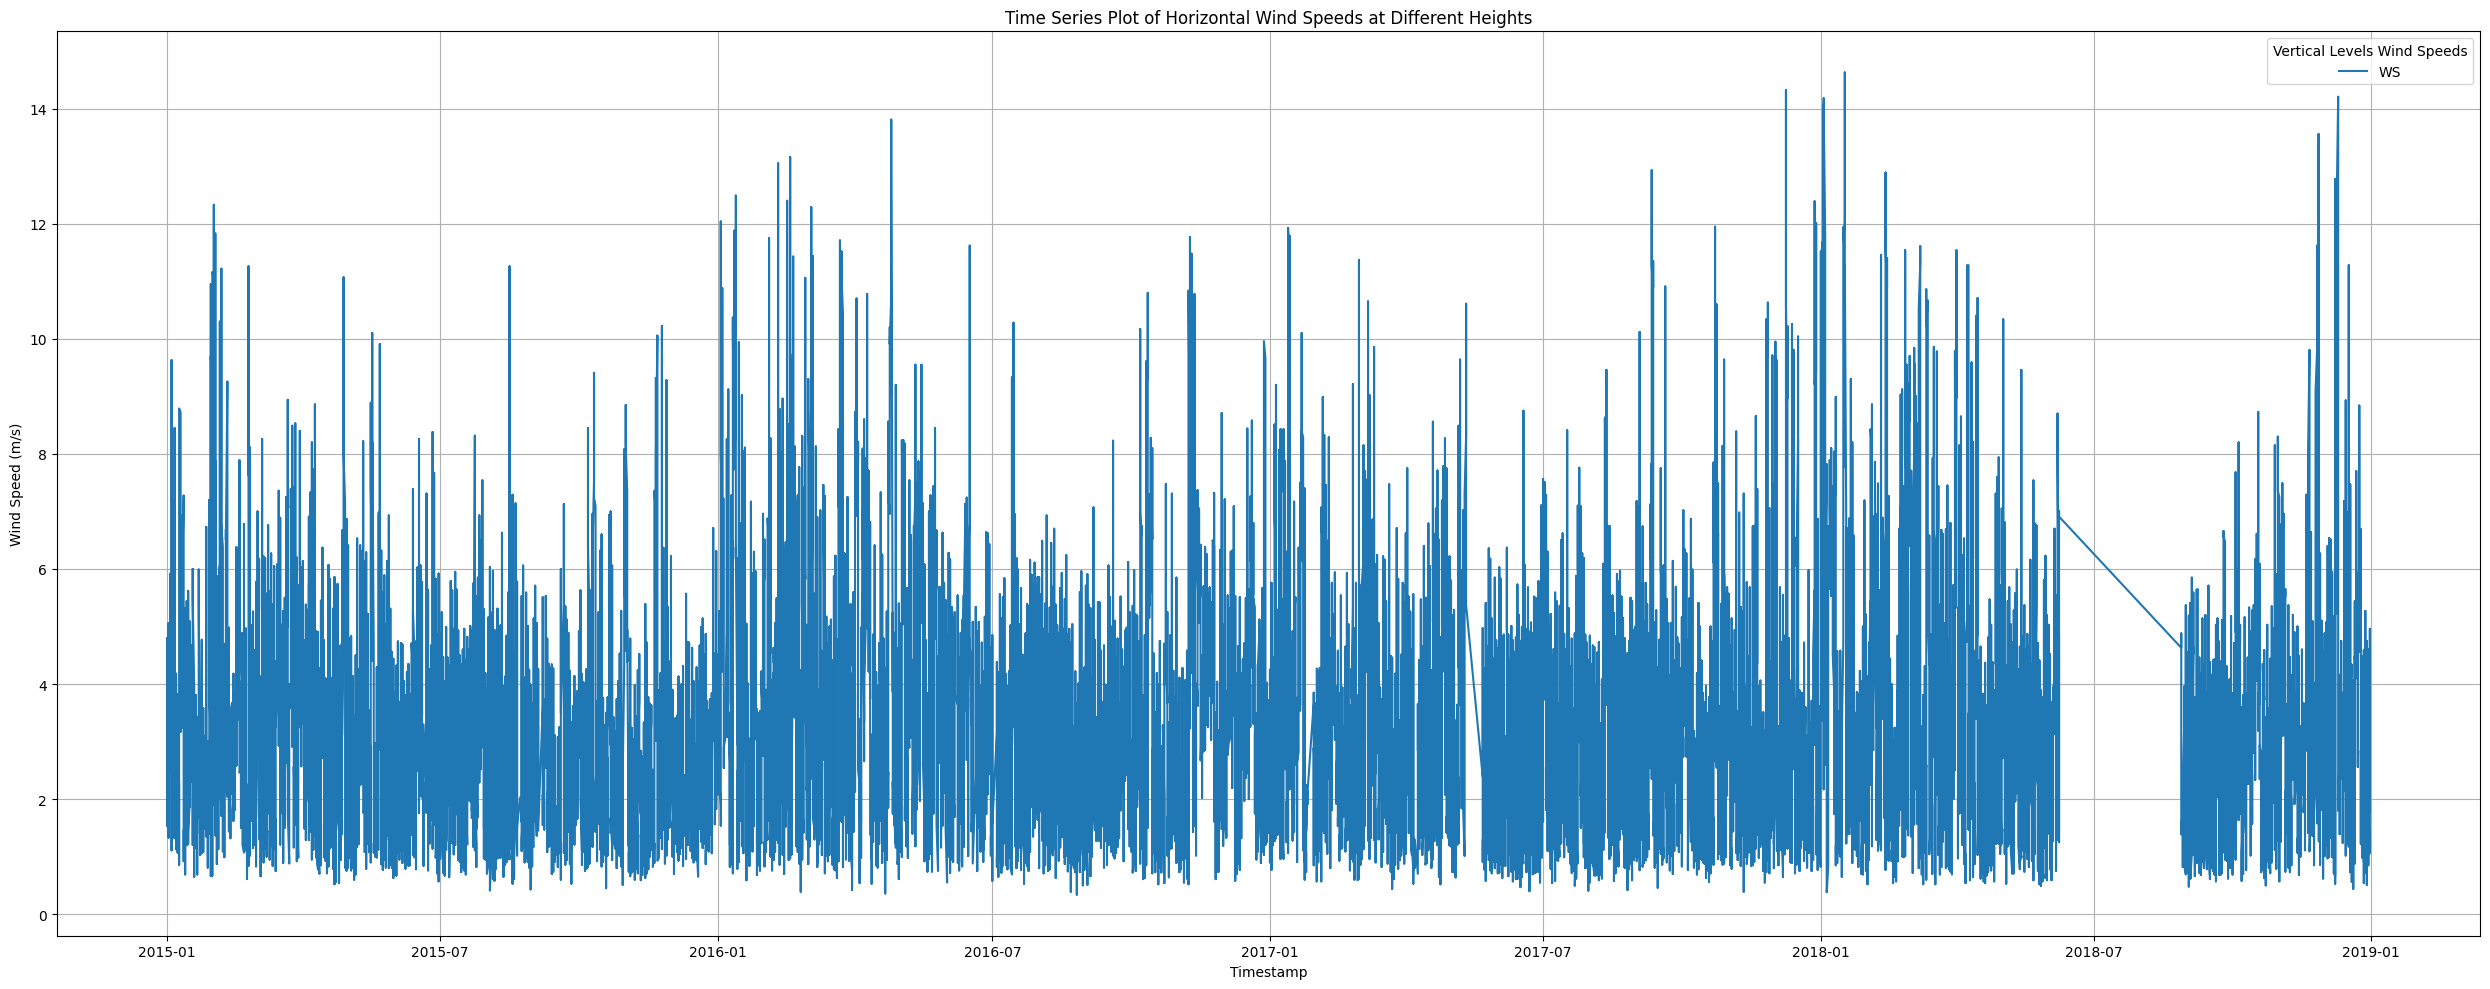

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/LMT_Meteo20152024_2015-2018.xlsx')

zephir_df.replace([-999.999, -9999], np.nan, inplace=True)

# Drop rows with NaN in the 'WS' column
# The original code assigned the method itself to zephir_df.
# We need to call the method and specify the subset of columns to consider for dropping NaNs.
zephir_df = zephir_df.dropna(subset=['WS'])

# Define column names
# These are the ORIGINAL names from the Excel file
original_columns = ['WS']

# Now, create the list of columns to plot using the NEW names
columns_to_plot = original_columns

# Plot
plt.figure(figsize=(25, 10))

# Iterate over the columns to plot
for col in columns_to_plot:
    # Ensure the column exists in the DataFrame
    # This check now works because zephir_df is a DataFrame again
    if col in zephir_df.columns:
         plt.plot(zephir_df['date'], zephir_df[col], label=col)
    else:
        # This warning is less likely now, but good to keep for robustness
        print(f"Warning: Column '{col}' not found in DataFrame.")


plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series Plot of Horizontal Wind Speeds at Different Heights')
plt.legend(title="Vertical Levels Wind Speeds", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

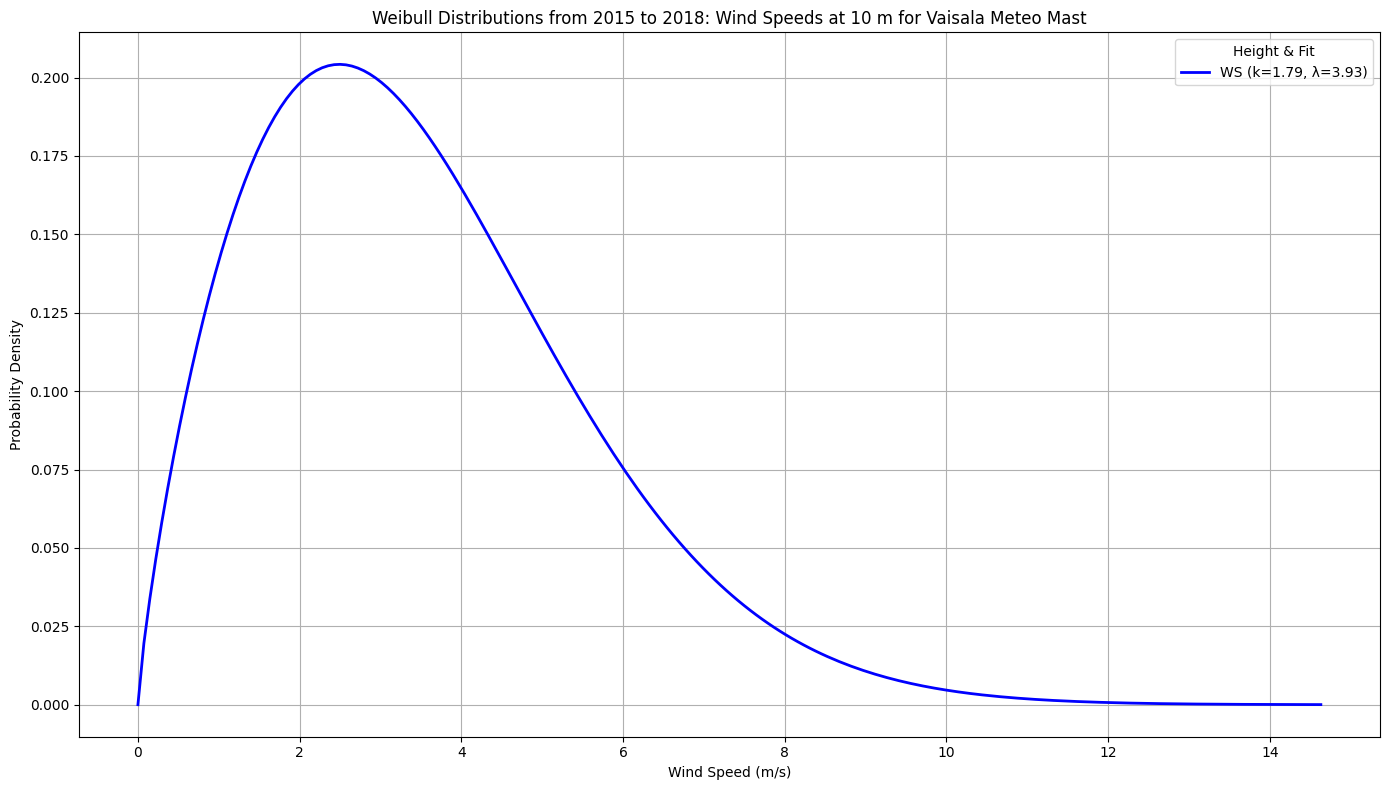

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# === Function to plot Weibull Distributions ===
def plot_weibull_distributions(data, columns, title, colors):
    plt.figure(figsize=(14, 8))

    for idx, col in enumerate(columns):
        if col in data.columns:
            speeds = data[col].dropna()
            speeds = speeds[np.isfinite(speeds.values)].values.flatten()

            if len(speeds) > 1:
                try:
                    shape, loc, scale = weibull_min.fit(speeds, floc=0)
                    x = np.linspace(0, speeds.max(), 200)
                    pdf = weibull_min.pdf(x, shape, loc=0, scale=scale)
                    plt.plot(x, pdf, color=colors[idx % len(colors)], linewidth=2,
                             label=f'{col} (k={shape:.2f}, λ={scale:.2f})')
                except Exception as e:
                    print(f"Error fitting Weibull for {col}: {e}")
            else:
                print(f"Insufficient data to fit Weibull for: {col}")
        else:
            print(f"Column not found: {col}")

    plt.title(title)
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Probability Density')
    plt.legend(title="Height & Fit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Plot the Weibull fits ===
plot_weibull_distributions(
    data=zephir_df,
    columns=columns_to_plot,
    title='Weibull Distributions from 2015 to 2018: Wind Speeds at 10 m for Vaisala Meteo Mast',
    colors='blue'
)

Processing feature: WS
ADF Statistic for WS: -19.004210131833048
p-value: 0.0
Critical Value (1%): -3.430558003370415
Critical Value (5%): -2.861631932022055
Critical Value (10%): -2.566818932582995


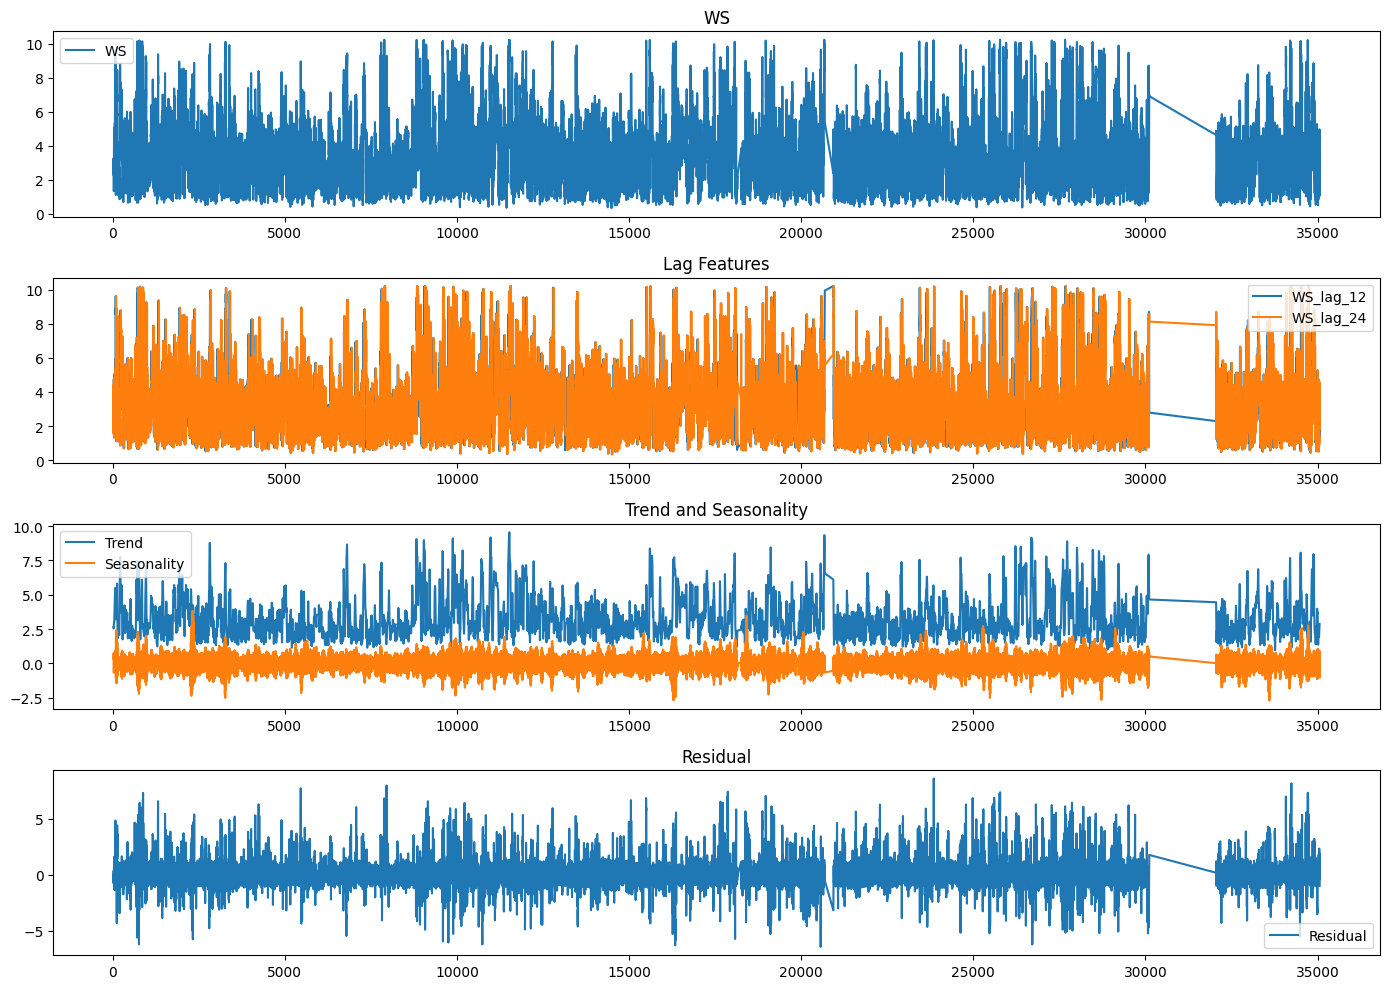


First 20 rows of 'WS':
    hour_prog       date      time  year  month  day  hour  weekday    WS  \
24       25.0 2015-01-02  00:00:00  2015      1    2     0        5  2.60   
25       26.0 2015-01-02  01:00:00  2015      1    2     1        5  3.26   
26       27.0 2015-01-02  02:00:00  2015      1    2     2        5  2.27   
27       28.0 2015-01-02  03:00:00  2015      1    2     3        5  2.52   
28       29.0 2015-01-02  04:00:00  2015      1    2     4        5  2.55   
29       30.0 2015-01-02  05:00:00  2015      1    2     5        5  2.47   
30       31.0 2015-01-02  06:00:00  2015      1    2     6        5  2.42   
31       32.0 2015-01-02  07:00:00  2015      1    2     7        5  1.71   
32       33.0 2015-01-02  08:00:00  2015      1    2     8        5  1.33   
33       34.0 2015-01-02  09:00:00  2015      1    2     9        5  3.03   
34       35.0 2015-01-02  10:00:00  2015      1    2    10        5  2.98   
35       36.0 2015-01-02  11:00:00  2015      1    2

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import STL
from verstack import NaNImputer  # Import NaNImputer as it was used previously
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Load Data ---zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_dropped.xlsx', parse_dates=['Timestamp'], index_col='Timestamp')

# --- Step 1: Sensor Fault Removal using Isolation Forest ---
def remove_outliers(df, feature_col):
    if df.empty:
        return df
    iso = IsolationForest(contamination=0.01, random_state=42)
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for outlier removal.")
        return df
    mask = iso.fit_predict(df[[feature_col]])
    return df[mask == 1]

# --- Step 2: Lag Features ---
def add_lag_features(df, feature_col, lags=[12]):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for adding lag features.")
        return df
    for lag in lags:
        df[f'{feature_col}_lag_{lag}'] = df[feature_col].shift(lag)
    return df

# --- Step 3: STL Decomposition ---
def apply_stl(df, feature_col, period=12):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for STL decomposition.")
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    if df[feature_col].isna().all():
        df[f'{feature_col}_trend'] = np.nan
        df[f'{feature_col}_seasonal'] = np.nan
        df[f'{feature_col}_resid'] = np.nan
        return df
    stl = STL(df[feature_col], period=period, robust=True)
    result = stl.fit()
    df[f'{feature_col}_trend'] = result.trend
    df[f'{feature_col}_seasonal'] = result.seasonal
    df[f'{feature_col}_resid'] = result.resid
    return df

# --- Stationarity Test ---
def test_stationarity(df, feature_col):
    if feature_col not in df.columns:
        print(f"Warning: Feature column '{feature_col}' not found for stationarity test.")
        return
    result = adfuller(df[feature_col].dropna())
    print(f"ADF Statistic for {feature_col}: {result[0]}")
    print(f"p-value: {result[1]}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")

# --- Plotting Function ---
def plot_feature_components(df, feature_col, lags=[12]):
    plt.figure(figsize=(14, 10))

    plt.subplot(4, 1, 1)
    plt.plot(df[feature_col], label=feature_col)
    plt.title(f'{feature_col}')
    plt.legend()

    for i, lag in enumerate(lags):
        plt.subplot(4, 1, 2)
        lag_col = f'{feature_col}_lag_{lag}'
        if lag_col in df.columns:
            plt.plot(df[lag_col], label=lag_col)
    plt.title('Lag Features')
    plt.legend()

    plt.subplot(4, 1, 3)
    if f'{feature_col}_trend' in df.columns:
        plt.plot(df[f'{feature_col}_trend'], label='Trend')
    if f'{feature_col}_seasonal' in df.columns:
        plt.plot(df[f'{feature_col}_seasonal'], label='Seasonality')
    plt.title('Trend and Seasonality')
    plt.legend()

    plt.subplot(4, 1, 4)
    if f'{feature_col}_resid' in df.columns:
        plt.plot(df[f'{feature_col}_resid'], label='Residual')
    plt.title('Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Master Pipeline ---
def preprocess_zephir(zephir_df, feature_cols=['WS'], lags=[12], stl_period=12):
    if zephir_df.empty:
        raise ValueError("Input DataFrame is empty.")

    processed_dfs = {}

    for feature_col in feature_cols:
        print(f"Processing feature: {feature_col}")
        current_df = zephir_df.copy()

        clean_df = remove_outliers(current_df, feature_col)
        if clean_df.empty:
            print(f"Warning: All data removed as outliers for feature: {feature_col}. Skipping.")
            continue

        fe_df = add_lag_features(clean_df, feature_col, lags)
        fe_df = apply_stl(fe_df, feature_col, period=stl_period)

        subset_cols = [feature_col] + [f'{feature_col}_lag_{lag}' for lag in lags] + [f'{feature_col}_trend', f'{feature_col}_seasonal', f'{feature_col}_resid']
        subset_cols = [col for col in subset_cols if col in fe_df.columns]

        fe_df.dropna(subset=subset_cols, inplace=True)
        if fe_df.empty:
            print(f"Warning: No data left after dropping NaNs for feature: {feature_col}. Skipping.")
            continue

        processed_dfs[feature_col] = fe_df

        test_stationarity(fe_df, feature_col)
        plot_feature_components(fe_df, feature_col, lags)

    return processed_dfs

# Example usage:
wind_speed_columns = ['WS']

processed_data = preprocess_zephir(zephir_df, feature_cols=wind_speed_columns, lags=[12, 24], stl_period=12)

# Dictionary to store successfully processed DataFrames
processed_dfs = {}

# Check each column
for col in columns_to_plot:
    if col in processed_data:
        processed_df = processed_data[col]
        print(f"\nFirst 20 rows of '{col}':")
        print(processed_df.head(20))
        processed_dfs[col] = processed_df
    else:
        print(f"Processing failed for '{col}'.")

# Convert dictionary to a DataFrame for saving (align on index)
final_df = pd.concat(processed_dfs, axis=1)

# Save to Excel
output_path = '/content/drive/MyDrive/Wind Data/LMT_Meteo20152024_2015-2018_preprocessed.xlsx'
final_df.to_excel(output_path)

print(f"\nSaved processed data to: {output_path}")

Error with WS: 'WS'


KeyError: 'temp'

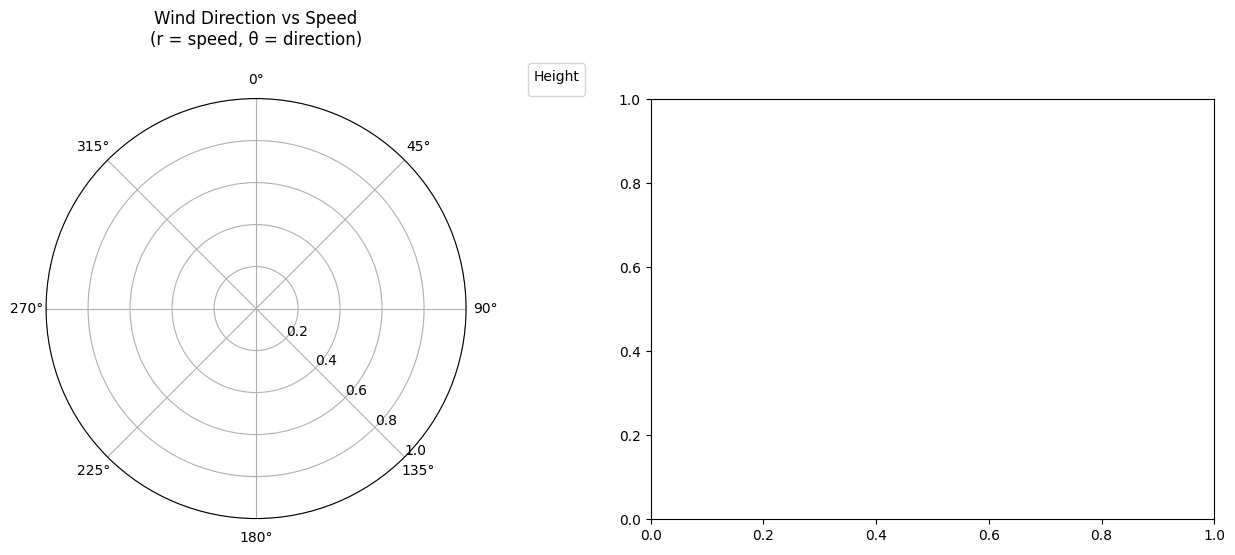

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define speed columns
zephir_df = pd.read_excel('/content/drive/MyDrive/Wind Data/Wind Lidar 2013 - 2018/ZephIR_Data_2015_2018_dropped.xlsx')

columns = ['WS']

# Create figure with 4 subplots (1 polar + 3 time series)
fig = plt.figure(figsize=(16, 12))

# === Subplot 1: Polar Wind Scatter ===
ax1 = plt.subplot(2, 2, 1, polar=True)
colors = plt.cm.tab10(np.linspace(0, 1, len(columns)))

for i, speed_col in enumerate(columns):
    try:
        idx = zephir_df.columns.get_loc(speed_col)
        direction_col = zephir_df.columns[idx + 2]

        mask = zephir_df[speed_col] > 4.5
        filtered = zephir_df.loc[mask, [speed_col, direction_col]].dropna()

        speeds = filtered[speed_col]
        directions = filtered[direction_col]
        angles_rad = np.deg2rad(directions)

        ax1.scatter(angles_rad, speeds, s=10, alpha=0.6,
                    color=colors[i % len(colors)],
                    label=speed_col.replace('Horizontal_speed_', '') + 'm')
    except Exception as e:
        print(f"Error with {speed_col}: {e}")

ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_rlabel_position(135)
ax1.legend(title="Height", bbox_to_anchor=(1.3, 1.1))
ax1.set_title('Wind Direction vs Speed\n(r = speed, θ = direction)', pad=20)

# Ensure data sorted by time
zephir_df = zephir_df.sort_index()

# === Subplot 2: Air Temperature ===
ax2 = plt.subplot(2, 2, 2)
ax2.plot(zephir_df.index, zephir_df['temp'], color='tab:red')
ax2.set_title('Air Temperature Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Temperature (°C)')

# === Subplot 3: Air Pressure ===
ax3 = plt.subplot(2, 2, 3)
ax3.plot(zephir_df.index, zephir_df['press'], color='tab:blue')
ax3.set_title('Air Pressure Over Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Pressure (hPa)')

# === Subplot 4: Humidity ===
ax4 = plt.subplot(2, 2, 4)
ax4.plot(zephir_df.index, zephir_df['RH'], color='tab:green')
ax4.set_title('Humidity Over Time')
ax4.set_xlabel('Time')
ax4.set_ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

# **Cleaning, Normalization, Feature Engineering (Lag Features, ETS Decomposition)**